In [15]:

import csv
import yaml

# Function to calculate 50s, 100s, and strike rate based on runs and balls played
def calculate_stats(player_data):
    player_data['Half Century (50s)'] = 1 if player_data.get('Runs', 0) >= 50 and player_data.get('Runs', 0) < 100 else 0
    player_data['Century (100s)'] = 1 if player_data.get('Runs', 0) >= 100 else 0
    # Calculate Ducks and Not Out based on runs and whether the player was out (kind is not 'Not Out')
    player_data['Ducks'] = 1 if player_data.get('Runs', 0) == 0 and player_data.get('Kind of Out', '') != 'Not Out' else 0
    player_data['Not Out'] = 1 if player_data.get('Kind of Out', '') == 'Not Out' else 0
    # Calculate strike rate with 2 decimal points
    if player_data.get('Balls Played', 0) > 0:
        player_data['Strike Rate'] = round((player_data.get('Runs', 0) / player_data.get('Balls Played', 0)) * 100, 2)
    else:
        player_data['Strike Rate'] = 0

    # Calculating Dream11 points based on provided scoring system
    runs = player_data.get('Runs', 0)
    fours = player_data.get('4s', 0)
    sixes = player_data.get('6s', 0)
    half_centuries = player_data.get('Half Century (50s)', 0)
    centuries = player_data.get('Century (100s)', 0)
    ducks = player_data.get('Ducks', 0)

    dream11_points = runs + fours + 2*sixes + 8*half_centuries + 16*centuries - 2*ducks
    player_data['Dream11 Points'] = dream11_points
# Initializing a list to store batsman data (per YAML file)
batsmen_data_list = []

# List of YAML file paths
yaml_files = ['598067.yaml', '829725.yaml', '501255.yaml', '1082637.yaml', '419157.yaml', '980943.yaml', '1216507.yaml', '548328.yaml', '598030.yaml', '501202.yaml', '1178422.yaml', '335984.yaml', '734017.yaml', '598026.yaml', '1216511.yaml', '501214.yaml', '419116.yaml', '1181768.yaml', '335992.yaml', '734001.yaml', '829733.yaml', '1216546.yaml', '548369.yaml', '598071.yaml', '419141.yaml', '1082621.yaml', '336039.yaml', '501243.yaml', '1254109.yaml', '980955.yaml', '1136561.yaml', '501238.yaml', '548312.yaml', '1216497.yaml', '1178418.yaml', '336015.yaml', '548345.yaml', '392220.yaml', '1254060.yaml', '980979.yaml', '336003.yaml', '829709.yaml', '548353.yaml', '1254076.yaml', '392236.yaml', '1254099.yaml', '1136609.yaml', '1136577.yaml', '1178398.yaml', '1136598.yaml', '1254113.yaml', '392216.yaml', '829729.yaml', '548373.yaml', '336023.yaml', '501259.yaml', '335988.yaml', '729279.yaml', '1175359.yaml', '548324.yaml', '829791.yaml', '548332.yaml', '1181764.yaml', '392191.yaml', '829787.yaml', '501218.yaml', '980959.yaml', '1254105.yaml', '392200.yaml', '548365.yaml', '336035.yaml', '1175363.yaml', '734021.yaml', '1178414.yaml', '501234.yaml', '733971.yaml', '419136.yaml', '598006.yaml', '1216531.yaml', '1136582.yaml', '1254083.yaml', '980975.yaml', '1136613.yaml', '419161.yaml', '1082601.yaml', '336019.yaml', '501263.yaml', '829713.yaml', '548349.yaml', '598051.yaml', '597998.yaml', '1136605.yaml', '980963.yaml', '1254095.yaml', '1082617.yaml', '598047.yaml', '829705.yaml', '734037.yaml', '1178402.yaml', '419120.yaml', '1082640.yaml', '501222.yaml', '1136594.yaml', '1216527.yaml', '1178394.yaml', '548308.yaml', '598010.yaml', '419121.yaml', '1082641.yaml', '501223.yaml', '829753.yaml', '1136595.yaml', '1216526.yaml', '1178395.yaml', '733989.yaml', '548309.yaml', '598011.yaml', '729311.yaml', '1178403.yaml', '980935.yaml', '1082616.yaml', '598046.yaml', '597999.yaml', '1136604.yaml', '1254094.yaml', '419160.yaml', '336018.yaml', '1082600.yaml', '501262.yaml', '548348.yaml', '598050.yaml', '1254082.yaml', '1136612.yaml', '501235.yaml', '419137.yaml', '598007.yaml', '1216530.yaml', '1136583.yaml', '829745.yaml', '1175362.yaml', '1082591.yaml', '980923.yaml', '1178415.yaml', '729307.yaml', '548364.yaml', '336034.yaml', '829801.yaml', '1254104.yaml', '392201.yaml', '829769.yaml', '548333.yaml', '392190.yaml', '501219.yaml', '729281.yaml', '548325.yaml', '392186.yaml', '980919.yaml', '335989.yaml', '729297.yaml', '1175358.yaml', '548372.yaml', '336022.yaml', '501258.yaml', '1254112.yaml', '829817.yaml', '392217.yaml', '980939.yaml', '1136576.yaml', '733985.yaml', '1178399.yaml', '981017.yaml', '1136599.yaml', '980981.yaml', '1254077.yaml', '392237.yaml', '1254098.yaml', '1136608.yaml', '336002.yaml', '548352.yaml', '392221.yaml', '1254061.yaml', '980997.yaml', '829821.yaml', '336014.yaml', '548344.yaml', '1178419.yaml', '501239.yaml', '829749.yaml', '981001.yaml', '733993.yaml', '548313.yaml', '1216496.yaml', '1254108.yaml', '1216547.yaml', '548368.yaml', '598070.yaml', '419140.yaml', '336038.yaml', '1082620.yaml', '501242.yaml', '980903.yaml', '335993.yaml', '598027.yaml', '1216510.yaml', '829765.yaml', '501215.yaml', '419117.yaml', '1178423.yaml', '335985.yaml', '980915.yaml', '829773.yaml', '1216506.yaml', '548329.yaml', '598031.yaml', '501203.yaml', '734041.yaml', '598066.yaml', '501254.yaml', '1082636.yaml', '419156.yaml', '980949.yaml', '1254115.yaml', '392210.yaml', '501199.yaml', '548375.yaml', '336025.yaml', '1178428.yaml', '548322.yaml', '392181.yaml', '501208.yaml', '829797.yaml', '335998.yaml', '1237180.yaml', '548334.yaml', '829781.yaml', '392197.yaml', '1254103.yaml', '392206.yaml', '829739.yaml', '548363.yaml', '336033.yaml', '501249.yaml', '1082596.yaml', '734027.yaml', '1175365.yaml', '1178412.yaml', '733977.yaml', '419130.yaml', '1082650.yaml', '501232.yaml', '1136584.yaml', '548318.yaml', '598000.yaml', '1216537.yaml', '1136615.yaml', '980973.yaml', '1254085.yaml', '501265.yaml', '1082607.yaml', '598057.yaml', '829715.yaml', '1254093.yaml', '980965.yaml', '1136603.yaml', '336009.yaml', '1082611.yaml', '548359.yaml', '598041.yaml', '734031.yaml', '1178404.yaml', '501224.yaml', '1082646.yaml', '419126.yaml', '1216521.yaml', '598016.yaml', '1136592.yaml', '829723.yaml', '548379.yaml', '598061.yaml', '419151.yaml', '336029.yaml', '1082631.yaml', '501253.yaml', '980945.yaml', '1216501.yaml', '598036.yaml', '501204.yaml', '419106.yaml', '335982.yaml', '1178424.yaml', '734011.yaml', '598020.yaml', '1216517.yaml', '419110.yaml', '501212.yaml', '335994.yaml', '734007.yaml', '1216540.yaml', '829735.yaml', '501245.yaml', '1082627.yaml', '419147.yaml', '548380.yaml']
for yaml_file_path in yaml_files:
    # Loading the YAML data
    with open(yaml_file_path, 'r') as yaml_file:
        yaml_data = yaml.safe_load(yaml_file)

    # Getting the player IDs from the registry
    player_registry = yaml_data.get('info', {}).get('registry', {}).get('people', {})

    # Initializing a dictionary to store batsman data (per YAML file)
    batsmen_data = {}

    # Getting the player of the match
    player_of_match = yaml_data.get('info', {}).get('player_of_match', [])[0] if 'player_of_match' in yaml_data.get('info', {}) else None

    # Getting the opponent team for each inning
    opponent_teams = {}
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        opponent_teams[innings_name] = inning[innings_name]['team']

    # Getting match date and format it
    match_dates = yaml_data.get('info', {}).get('dates', ['Unknown']) if 'dates' in yaml_data.get('info', {}) else ['Unknown']
    formatted_match_date = str(match_dates[0])  # Convert to string

    # Initializing a dictionary to store bowlers for each innings
    bowlers = {}

    # Extracting bowlers and their respective victims
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        for delivery in inning[innings_name]['deliveries']:
            bowler = list(delivery.values())[0]['bowler']
            batsman = list(delivery.values())[0].get('wicket', {}).get('player_out', 'Not Out')
            if bowler in bowlers:
                bowlers[bowler].append(batsman)
            else:
                bowlers[bowler] = [batsman]

    # Iterating through innings
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        innings_type = '1st Innings' if innings_name == '1st innings' else '2nd Innings'
        team_name = inning[innings_name]['team']
        opponent_team = opponent_teams.get('2nd innings', 'Unknown Opponent') if innings_name == '1st innings' else opponent_teams.get('1st innings', 'Unknown Opponent')
        city = yaml_data['info'].get('city', 'Unknown City') if 'info' in yaml_data and 'city' in yaml_data['info'] else 'Unknown City'
        stadium_name = yaml_data['info']['venue']
        for delivery in inning[innings_name]['deliveries']:
            delivery_info = list(delivery.values())[0]  # Get the delivery info dictionary
            batsman = delivery_info.get('batsman', 'Unknown Batsman')
            extras = delivery_info.get('extras', {}).get('wides', 0)
            runs = delivery_info.get('runs', {}).get('batsman', 0)
            # Check if 'wicket' key exists before accessing its subkeys
            wicket_info = delivery_info.get('wicket', {})
            out_kind = wicket_info.get('kind', 'Not Out') if wicket_info else 'Not Out'
            player_id = player_registry.get(batsman, '')  # Get player ID from registry
            #extras = list(delivery.values())[0].get('extras', {}).get('wides', 0)

            # Get the bowler's name for the player who got out
            if out_kind != 'Not Out':
                bowler_name = next((bowler for bowler, victims in bowlers.items() if batsman in victims), '')
            else:
                bowler_name = 'Not Out'

            # Update or add the batsman's data
            if batsman in batsmen_data:
                if extras == 0:  # Exclude extras from ball count
                    batsmen_data[batsman]['Balls Played'] += 1  # Count as a ball played if no extras
                batsmen_data[batsman]['Runs'] += runs
                batsmen_data[batsman]['6s'] += 1 if runs == 6 else 0
                batsmen_data[batsman]['4s'] += 1 if runs == 4 else 0
                batsmen_data[batsman]['Out'] = 1 if out_kind != 'Not Out' else 0
                batsmen_data[batsman]['Player ID'] = player_id
                if batsman == player_of_match:
                    batsmen_data[batsman]['Player of the Match'] = 1
                else:
                    batsmen_data[batsman]['Player of the Match'] = 0
                batsmen_data[batsman]['Opponent Team'] = opponent_team
                batsmen_data[batsman]['Match Date'] = formatted_match_date
                batsmen_data[batsman]['Kind of Out'] = out_kind
                batsmen_data[batsman]['Bowler'] = bowler_name
            else:
                batsmen_data[batsman] = {
                    'Match': f"{team_name} vs {opponent_team}",
                    'Innings': team_name,
                    'Batsman Name': batsman,
                    'Runs': runs,
                    'Balls Played': 1 if extras == 0 else 0,  # Count as a ball played if no extras
                    '6s': 1 if runs == 6 else 0,
                    '4s': 1 if runs == 4 else 0,
                    'Out': 1 if out_kind != 'Not Out' else 0,
                    'City': city,
                    'Stadium Name': stadium_name,
                    'Innings Type': innings_type,
                    'Player ID': player_id,
                    'Player of the Match': 1 if batsman == player_of_match else 0,
                    'Opponent Team': opponent_team,
                    'Match Date': formatted_match_date,
                    'Kind of Out': out_kind,
                    'Bowler': bowler_name if out_kind != 'Not Out' else 'Not Out'
                }

    # Calculating '50s', '100s', 'Ducks', 'Not Out', and 'Strike Rate' for each player
    for player_data in batsmen_data.values():
        calculate_stats(player_data)

    # Append the batsmen data for this YAML file to the list
    batsmen_data_list.extend(batsmen_data.values())

# Defining the output file path
output_file_path = 'batsman_data_set_IplPart1_Dream11.csv'

# Updating the 'fieldnames' and include 'Dream11 Points'
fieldnames = ['Match', 'Innings', 'Batsman Name', 'Runs', 'Balls Played', '6s', '4s', 'Ducks', 'Not Out', 'Half Century (50s)', 'Century (100s)', 'Strike Rate', 'City', 'Stadium Name', 'Innings Type', 'Player ID', 'Player of the Match', 'Opponent Team', 'Match Date', 'Kind of Out', 'Bowler', 'Dream11 Points']

# Writing to the CSV file
with open(output_file_path, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for batsman_data in batsmen_data_list:
        calculate_stats(batsman_data)  # Calculate Dream11 points
        # Remove the 'Out' field from the data before writing to CSV
        batsman_data.pop('Out', None)
        writer.writerow(batsman_data)

print('Batsman data saved to', output_file_path)

# Readoig and displaying the data from the CSV file
with open(output_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row)

Batsman data saved to batsman_data_set_IplPart1_Dream11.csv
{'Match': 'Pune Warriors vs Delhi Daredevils', 'Innings': 'Pune Warriors', 'Batsman Name': 'RV Uthappa', 'Runs': '24', 'Balls Played': '20', '6s': '0', '4s': '3', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '0', 'Century (100s)': '0', 'Strike Rate': '120.0', 'City': 'Pune', 'Stadium Name': 'Subrata Roy Sahara Stadium', 'Innings Type': '1st Innings', 'Player ID': '1c17e270', 'Player of the Match': '0', 'Opponent Team': 'Delhi Daredevils', 'Match Date': '2013-05-19', 'Kind of Out': 'caught', 'Bowler': 'UT Yadav', 'Dream11 Points': '27'}
{'Match': 'Pune Warriors vs Delhi Daredevils', 'Innings': 'Pune Warriors', 'Batsman Name': 'AJ Finch', 'Runs': '52', 'Balls Played': '34', '6s': '4', '4s': '3', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '1', 'Century (100s)': '0', 'Strike Rate': '152.94', 'City': 'Pune', 'Stadium Name': 'Subrata Roy Sahara Stadium', 'Innings Type': '1st Innings', 'Player ID': 'b8d490fd', 'Player

In [16]:

import csv
import yaml

# Function to calculate 50s, 100s, and strike rate based on runs and balls played
def calculate_stats(player_data):
    player_data['Half Century (50s)'] = 1 if player_data.get('Runs', 0) >= 50 and player_data.get('Runs', 0) < 100 else 0
    player_data['Century (100s)'] = 1 if player_data.get('Runs', 0) >= 100 else 0
    # Calculate Ducks and Not Out based on runs and whether the player was out (kind is not 'Not Out')
    player_data['Ducks'] = 1 if player_data.get('Runs', 0) == 0 and player_data.get('Kind of Out', '') != 'Not Out' else 0
    player_data['Not Out'] = 1 if player_data.get('Kind of Out', '') == 'Not Out' else 0
    # Calculate strike rate with 2 decimal points
    if player_data.get('Balls Played', 0) > 0:
        player_data['Strike Rate'] = round((player_data.get('Runs', 0) / player_data.get('Balls Played', 0)) * 100, 2)
    else:
        player_data['Strike Rate'] = 0

    # Calculating Dream11 points based on provided scoring system
    runs = player_data.get('Runs', 0)
    fours = player_data.get('4s', 0)
    sixes = player_data.get('6s', 0)
    half_centuries = player_data.get('Half Century (50s)', 0)
    centuries = player_data.get('Century (100s)', 0)
    ducks = player_data.get('Ducks', 0)

    dream11_points = runs + fours + 2*sixes + 8*half_centuries + 16*centuries - 2*ducks
    player_data['Dream11 Points'] = dream11_points
# Initializing a list to store batsman data (per YAML file)
batsmen_data_list = []

# List of YAML file paths
yaml_files = ['980953.yaml', '1136567.yaml', '548314.yaml', '1136588.yaml', '1175369.yaml', '336013.yaml', '501269.yaml', '829719.yaml', '548343.yaml', '392226.yaml', '1254066.yaml', '1254089.yaml', '1136619.yaml', '336005.yaml', '548355.yaml', '1254070.yaml', '392230.yaml', '980969.yaml', '501228.yaml', '1136571.yaml', '1178408.yaml', '1178409.yaml', '501229.yaml', '1136570.yaml', '829759.yaml', '981011.yaml', '733983.yaml', '1254071.yaml', '392231.yaml', '980987.yaml', '336004.yaml', '548354.yaml', '980991.yaml', '392227.yaml', '1254067.yaml', '1254088.yaml', '1136618.yaml', '336012.yaml', '501268.yaml', '548342.yaml', '1175368.yaml', '980929.yaml', '1136566.yaml', '733995.yaml', '548315.yaml', '1136589.yaml', '981007.yaml', '1216541.yaml', '501244.yaml', '1082626.yaml', '419146.yaml', '548381.yaml', '980905.yaml', '335995.yaml', '829763.yaml', '548339.yaml', '598021.yaml', '1216516.yaml', '419111.yaml', '501213.yaml', '335983.yaml', '980913.yaml', '1178425.yaml', '1216500.yaml', '598037.yaml', '829775.yaml', '501205.yaml', '419107.yaml', '734047.yaml', '548378.yaml', '598060.yaml', '419150.yaml', '1082630.yaml', '336028.yaml', '501252.yaml', '501225.yaml', '1082647.yaml', '419127.yaml', '1216520.yaml', '1178393.yaml', '598017.yaml', '1136593.yaml', '1175372.yaml', '980933.yaml', '729317.yaml', '1178405.yaml', '1082610.yaml', '336008.yaml', '548358.yaml', '598040.yaml', '1254092.yaml', '1136602.yaml', '501264.yaml', '1082606.yaml', '598056.yaml', '1136614.yaml', '1254084.yaml', '419131.yaml', '501233.yaml', '829743.yaml', '1136585.yaml', '548319.yaml', '598001.yaml', '1216536.yaml', '733999.yaml', '1082597.yaml', '1175364.yaml', '1178413.yaml', '729301.yaml', '980925.yaml', '548362.yaml', '336032.yaml', '501248.yaml', '829807.yaml', '1254102.yaml', '392207.yaml', '548335.yaml', '392196.yaml', '335999.yaml', '980909.yaml', '729287.yaml', '1237181.yaml', '829779.yaml', '548323.yaml', '501209.yaml', '1178429.yaml', '729291.yaml', '1237178.yaml', '548374.yaml', '336024.yaml', '1254114.yaml', '829811.yaml', '392211.yaml', '501198.yaml', '1136590.yaml', '1216523.yaml', '598014.yaml', '419124.yaml', '501226.yaml', '1082644.yaml', '1178406.yaml', '734033.yaml', '1175371.yaml', '598043.yaml', '1082613.yaml', '501271.yaml', '980967.yaml', '1136601.yaml', '1254091.yaml', '829717.yaml', '598055.yaml', '419165.yaml', '501267.yaml', '1082605.yaml', '1254087.yaml', '1136617.yaml', '980971.yaml', '1254068.yaml', '392228.yaml', '598002.yaml', '1216535.yaml', '1136586.yaml', '501230.yaml', '1136569.yaml', '733975.yaml', '419132.yaml', '1178410.yaml', '1175367.yaml', '1082594.yaml', '734025.yaml', '1082629.yaml', '336031.yaml', '419149.yaml', '548361.yaml', '392204.yaml', '1254101.yaml', '392195.yaml', '829783.yaml', '1216519.yaml', '548336.yaml', '734009.yaml', '829795.yaml', '392183.yaml', '419108.yaml', '548320.yaml', '598038.yaml', '336027.yaml', '548377.yaml', '392212.yaml', '1254117.yaml', '598018.yaml', '1082648.yaml', '1136573.yaml', '419128.yaml', '1254072.yaml', '392232.yaml', '548357.yaml', '336007.yaml', '392224.yaml', '1254064.yaml', '548341.yaml', '598059.yaml', '1082609.yaml', '336011.yaml', '734029.yaml', '1082598.yaml', '1216539.yaml', '1216493.yaml', '548316.yaml', '733979.yaml', '1136565.yaml']
for yaml_file_path in yaml_files:
    # Loading the YAML data
    with open(yaml_file_path, 'r') as yaml_file:
        yaml_data = yaml.safe_load(yaml_file)

    # Getting the player IDs from the registry
    player_registry = yaml_data.get('info', {}).get('registry', {}).get('people', {})

    # Initializing a dictionary to store batsman data (per YAML file)
    batsmen_data = {}

    # Getting the player of the match
    player_of_match = yaml_data.get('info', {}).get('player_of_match', [])[0] if 'player_of_match' in yaml_data.get('info', {}) else None

    # Getting the opponent team for each inning
    opponent_teams = {}
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        opponent_teams[innings_name] = inning[innings_name]['team']

    # Getting match date and format it
    match_dates = yaml_data.get('info', {}).get('dates', ['Unknown']) if 'dates' in yaml_data.get('info', {}) else ['Unknown']
    formatted_match_date = str(match_dates[0])  # Convert to string

    # Initializing a dictionary to store bowlers for each innings
    bowlers = {}

    # Extracting bowlers and their respective victims
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        for delivery in inning[innings_name]['deliveries']:
            bowler = list(delivery.values())[0]['bowler']
            batsman = list(delivery.values())[0].get('wicket', {}).get('player_out', 'Not Out')
            if bowler in bowlers:
                bowlers[bowler].append(batsman)
            else:
                bowlers[bowler] = [batsman]

    # Iterating through innings
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        innings_type = '1st Innings' if innings_name == '1st innings' else '2nd Innings'
        team_name = inning[innings_name]['team']
        opponent_team = opponent_teams.get('2nd innings', 'Unknown Opponent') if innings_name == '1st innings' else opponent_teams.get('1st innings', 'Unknown Opponent')
        city = yaml_data['info'].get('city', 'Unknown City') if 'info' in yaml_data and 'city' in yaml_data['info'] else 'Unknown City'
        stadium_name = yaml_data['info']['venue']
        for delivery in inning[innings_name]['deliveries']:
            delivery_info = list(delivery.values())[0]  # Get the delivery info dictionary
            batsman = delivery_info.get('batsman', 'Unknown Batsman')
            extras = delivery_info.get('extras', {}).get('wides', 0)
            runs = delivery_info.get('runs', {}).get('batsman', 0)
            # Check if 'wicket' key exists before accessing its subkeys
            wicket_info = delivery_info.get('wicket', {})
            out_kind = wicket_info.get('kind', 'Not Out') if wicket_info else 'Not Out'
            player_id = player_registry.get(batsman, '')  # Get player ID from registry
            #extras = list(delivery.values())[0].get('extras', {}).get('wides', 0)

            # Get the bowler's name for the player who got out
            if out_kind != 'Not Out':
                bowler_name = next((bowler for bowler, victims in bowlers.items() if batsman in victims), '')
            else:
                bowler_name = 'Not Out'

            # Update or add the batsman's data
            if batsman in batsmen_data:
                if extras == 0:  # Exclude extras from ball count
                    batsmen_data[batsman]['Balls Played'] += 1  # Count as a ball played if no extras
                batsmen_data[batsman]['Runs'] += runs
                batsmen_data[batsman]['6s'] += 1 if runs == 6 else 0
                batsmen_data[batsman]['4s'] += 1 if runs == 4 else 0
                batsmen_data[batsman]['Out'] = 1 if out_kind != 'Not Out' else 0
                batsmen_data[batsman]['Player ID'] = player_id
                if batsman == player_of_match:
                    batsmen_data[batsman]['Player of the Match'] = 1
                else:
                    batsmen_data[batsman]['Player of the Match'] = 0
                batsmen_data[batsman]['Opponent Team'] = opponent_team
                batsmen_data[batsman]['Match Date'] = formatted_match_date
                batsmen_data[batsman]['Kind of Out'] = out_kind
                batsmen_data[batsman]['Bowler'] = bowler_name
            else:
                batsmen_data[batsman] = {
                    'Match': f"{team_name} vs {opponent_team}",
                    'Innings': team_name,
                    'Batsman Name': batsman,
                    'Runs': runs,
                    'Balls Played': 1 if extras == 0 else 0,  # Count as a ball played if no extras
                    '6s': 1 if runs == 6 else 0,
                    '4s': 1 if runs == 4 else 0,
                    'Out': 1 if out_kind != 'Not Out' else 0,
                    'City': city,
                    'Stadium Name': stadium_name,
                    'Innings Type': innings_type,
                    'Player ID': player_id,
                    'Player of the Match': 1 if batsman == player_of_match else 0,
                    'Opponent Team': opponent_team,
                    'Match Date': formatted_match_date,
                    'Kind of Out': out_kind,
                    'Bowler': bowler_name if out_kind != 'Not Out' else 'Not Out'
                }

    # Calculating '50s', '100s', 'Ducks', 'Not Out', and 'Strike Rate' for each player
    for player_data in batsmen_data.values():
        calculate_stats(player_data)

    # Append the batsmen data for this YAML file to the list
    batsmen_data_list.extend(batsmen_data.values())

# Defining the output file path
output_file_path = 'batsman_data_set_IplPart2_Dream11.csv'

# Updating the 'fieldnames' and include 'Dream11 Points'
fieldnames = ['Match', 'Innings', 'Batsman Name', 'Runs', 'Balls Played', '6s', '4s', 'Ducks', 'Not Out', 'Half Century (50s)', 'Century (100s)', 'Strike Rate', 'City', 'Stadium Name', 'Innings Type', 'Player ID', 'Player of the Match', 'Opponent Team', 'Match Date', 'Kind of Out', 'Bowler', 'Dream11 Points']

# Writing to the CSV file
with open(output_file_path, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for batsman_data in batsmen_data_list:
        calculate_stats(batsman_data)  # Calculate Dream11 points
        # Remove the 'Out' field from the data before writing to CSV
        batsman_data.pop('Out', None)
        writer.writerow(batsman_data)

print('Batsman data saved to', output_file_path)

# Readoig and displaying the data from the CSV file
with open(output_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row)

Batsman data saved to batsman_data_set_IplPart2_Dream11.csv
{'Match': 'Sunrisers Hyderabad vs Royal Challengers Bangalore', 'Innings': 'Sunrisers Hyderabad', 'Batsman Name': 'DA Warner', 'Runs': '92', 'Balls Played': '50', '6s': '5', '4s': '9', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '1', 'Century (100s)': '0', 'Strike Rate': '184.0', 'City': 'Hyderabad', 'Stadium Name': 'Rajiv Gandhi International Stadium, Uppal', 'Innings Type': '1st Innings', 'Player ID': 'dcce6f09', 'Player of the Match': '1', 'Opponent Team': 'Royal Challengers Bangalore', 'Match Date': '2016-04-30', 'Kind of Out': 'caught', 'Bowler': 'T Shamsi', 'Dream11 Points': '119'}
{'Match': 'Sunrisers Hyderabad vs Royal Challengers Bangalore', 'Innings': 'Sunrisers Hyderabad', 'Batsman Name': 'S Dhawan', 'Runs': '11', 'Balls Played': '11', '6s': '0', '4s': '2', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '0', 'Century (100s)': '0', 'Strike Rate': '100.0', 'City': 'Hyderabad', 'Stadium Name': 'Rajiv Gandh

In [17]:

import csv
import yaml

# Function to calculate 50s, 100s, and strike rate based on runs and balls played
def calculate_stats(player_data):
    player_data['Half Century (50s)'] = 1 if player_data.get('Runs', 0) >= 50 and player_data.get('Runs', 0) < 100 else 0
    player_data['Century (100s)'] = 1 if player_data.get('Runs', 0) >= 100 else 0
    # Calculate Ducks and Not Out based on runs and whether the player was out (kind is not 'Not Out')
    player_data['Ducks'] = 1 if player_data.get('Runs', 0) == 0 and player_data.get('Kind of Out', '') != 'Not Out' else 0
    player_data['Not Out'] = 1 if player_data.get('Kind of Out', '') == 'Not Out' else 0
    # Calculate strike rate with 2 decimal points
    if player_data.get('Balls Played', 0) > 0:
        player_data['Strike Rate'] = round((player_data.get('Runs', 0) / player_data.get('Balls Played', 0)) * 100, 2)
    else:
        player_data['Strike Rate'] = 0

    # Calculating Dream11 points based on provided scoring system
    runs = player_data.get('Runs', 0)
    fours = player_data.get('4s', 0)
    sixes = player_data.get('6s', 0)
    half_centuries = player_data.get('Half Century (50s)', 0)
    centuries = player_data.get('Century (100s)', 0)
    ducks = player_data.get('Ducks', 0)

    dream11_points = runs + fours + 2*sixes + 8*half_centuries + 16*centuries - 2*ducks
    player_data['Dream11 Points'] = dream11_points
# Initializing a list to store batsman data (per YAML file)
batsmen_data_list = []

# List of YAML file paths
yaml_files = ['392208.yaml', '980951.yaml', '419145.yaml', '501247.yaml', '1082625.yaml', '829737.yaml', '1216542.yaml', '734005.yaml', '335996.yaml', '1178430.yaml', '501210.yaml', '392199.yaml', '419112.yaml', '598022.yaml', '1216515.yaml', '734013.yaml', '1237177.yaml', '1178426.yaml', '829799.yaml', '501206.yaml', '1216503.yaml', '598034.yaml', '980947.yaml', '1082633.yaml', '501251.yaml', '419153.yaml', '598063.yaml', '829721.yaml', '1082632.yaml', '501250.yaml', '419152.yaml', '598062.yaml', '734045.yaml', '1136620.yaml', '501207.yaml', '829777.yaml', '1216502.yaml', '598035.yaml', '1178427.yaml', '980911.yaml', '501211.yaml', '392198.yaml', '419113.yaml', '598023.yaml', '1216514.yaml', '829761.yaml', '980907.yaml', '335997.yaml', '1178431.yaml', '729289.yaml', '419144.yaml', '501246.yaml', '1082624.yaml', '1216543.yaml', '392209.yaml', '829809.yaml', '981005.yaml', '733997.yaml', '1216538.yaml', '1216492.yaml', '548317.yaml', '1136564.yaml', '1082599.yaml', '598058.yaml', '336010.yaml', '1082608.yaml', '392225.yaml', '1254065.yaml', '980993.yaml', '548356.yaml', '336006.yaml', '980985.yaml', '1254073.yaml', '392233.yaml', '598019.yaml', '733981.yaml', '981013.yaml', '1082649.yaml', '1136572.yaml', '419129.yaml', '734049.yaml', '392213.yaml', '1254116.yaml', '829813.yaml', '336026.yaml', '548376.yaml', '729293.yaml', '392182.yaml', '419109.yaml', '548321.yaml', '598039.yaml', '729285.yaml', '392194.yaml', '1216518.yaml', '548337.yaml', '392205.yaml', '829805.yaml', '1254100.yaml', '1082628.yaml', '419148.yaml', '548360.yaml', '980927.yaml', '729303.yaml', '1178411.yaml', '1175366.yaml', '1082595.yaml', '598003.yaml', '1216534.yaml', '829741.yaml', '1136587.yaml', '981009.yaml', '501231.yaml', '1136568.yaml', '419133.yaml', '1254086.yaml', '1136616.yaml', '1254069.yaml', '392229.yaml', '598054.yaml', '419164.yaml', '501266.yaml', '1082604.yaml', '1136600.yaml', '1254090.yaml', '980989.yaml', '598042.yaml', '1082612.yaml', '501270.yaml', '1178407.yaml', '729315.yaml', '980931.yaml', '1175370.yaml', '1136591.yaml', '829757.yaml', '1216522.yaml', '598015.yaml', '419125.yaml', '501227.yaml', '1082645.yaml', '734039.yaml', '548306.yaml', '1216529.yaml', '1136575.yaml', '1254074.yaml', '392234.yaml', '548351.yaml', '598049.yaml', '336001.yaml', '392222.yaml', '1254062.yaml', '548347.yaml', '336017.yaml', '548310.yaml', '1216495.yaml', '598008.yaml', '1136563.yaml', '336040.yaml', '419138.yaml', '980957.yaml', '1082623.yaml', '501241.yaml', '419143.yaml', '1216544.yaml', '598073.yaml', '829731.yaml', '734003.yaml', '335990.yaml', '419114.yaml', '501216.yaml', '829789.yaml', '598024.yaml', '1216513.yaml', '1175357.yaml', '734015.yaml', '335986.yaml', '1178420.yaml', '501200.yaml', '392189.yaml', '1216505.yaml', '598032.yaml', '392218.yaml', '1254058.yaml', '980941.yaml', '419155.yaml', '501257.yaml', '1082635.yaml', '829727.yaml', '598065.yaml', '1178396.yaml', '1216525.yaml', '598012.yaml', '1136596.yaml', '1136579.yaml', '1082642.yaml', '501220.yaml', '419122.yaml', '1178400.yaml', '734035.yaml', '829707.yaml', '598045.yaml', '1082615.yaml', '1254097.yaml', '1136607.yaml', '980961.yaml', '392238.yaml', '1254078.yaml', '598053.yaml', '829711.yaml', '1082603.yaml', '501261.yaml', '419163.yaml', '980977.yaml', '1136611.yaml', '1254081.yaml', '1136580.yaml', '598004.yaml', '1216499.yaml', '1216533.yaml', '733973.yaml', '419134.yaml', '501236.yaml', '1178416.yaml', '1082592.yaml', '734023.yaml', '1175361.yaml', '336037.yaml', '548367.yaml', '392202.yaml', '1254107.yaml']
for yaml_file_path in yaml_files:
    # Loading the YAML data
    with open(yaml_file_path, 'r') as yaml_file:
        yaml_data = yaml.safe_load(yaml_file)

    # Getting the player IDs from the registry
    player_registry = yaml_data.get('info', {}).get('registry', {}).get('people', {})

    # Initializing a dictionary to store batsman data (per YAML file)
    batsmen_data = {}

    # Getting the player of the match
    player_of_match = yaml_data.get('info', {}).get('player_of_match', [])[0] if 'player_of_match' in yaml_data.get('info', {}) else None

    # Getting the opponent team for each inning
    opponent_teams = {}
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        opponent_teams[innings_name] = inning[innings_name]['team']

    # Getting match date and format it
    match_dates = yaml_data.get('info', {}).get('dates', ['Unknown']) if 'dates' in yaml_data.get('info', {}) else ['Unknown']
    formatted_match_date = str(match_dates[0])  # Convert to string

    # Initializing a dictionary to store bowlers for each innings
    bowlers = {}

    # Extracting bowlers and their respective victims
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        for delivery in inning[innings_name]['deliveries']:
            bowler = list(delivery.values())[0]['bowler']
            batsman = list(delivery.values())[0].get('wicket', {}).get('player_out', 'Not Out')
            if bowler in bowlers:
                bowlers[bowler].append(batsman)
            else:
                bowlers[bowler] = [batsman]

    # Iterating through innings
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        innings_type = '1st Innings' if innings_name == '1st innings' else '2nd Innings'
        team_name = inning[innings_name]['team']
        opponent_team = opponent_teams.get('2nd innings', 'Unknown Opponent') if innings_name == '1st innings' else opponent_teams.get('1st innings', 'Unknown Opponent')
        city = yaml_data['info'].get('city', 'Unknown City') if 'info' in yaml_data and 'city' in yaml_data['info'] else 'Unknown City'
        stadium_name = yaml_data['info']['venue']
        for delivery in inning[innings_name]['deliveries']:
            delivery_info = list(delivery.values())[0]  # Get the delivery info dictionary
            batsman = delivery_info.get('batsman', 'Unknown Batsman')
            extras = delivery_info.get('extras', {}).get('wides', 0)
            runs = delivery_info.get('runs', {}).get('batsman', 0)
            # Check if 'wicket' key exists before accessing its subkeys
            wicket_info = delivery_info.get('wicket', {})
            out_kind = wicket_info.get('kind', 'Not Out') if wicket_info else 'Not Out'
            player_id = player_registry.get(batsman, '')  # Get player ID from registry
            #extras = list(delivery.values())[0].get('extras', {}).get('wides', 0)

            # Get the bowler's name for the player who got out
            if out_kind != 'Not Out':
                bowler_name = next((bowler for bowler, victims in bowlers.items() if batsman in victims), '')
            else:
                bowler_name = 'Not Out'

            # Update or add the batsman's data
            if batsman in batsmen_data:
                if extras == 0:  # Exclude extras from ball count
                    batsmen_data[batsman]['Balls Played'] += 1  # Count as a ball played if no extras
                batsmen_data[batsman]['Runs'] += runs
                batsmen_data[batsman]['6s'] += 1 if runs == 6 else 0
                batsmen_data[batsman]['4s'] += 1 if runs == 4 else 0
                batsmen_data[batsman]['Out'] = 1 if out_kind != 'Not Out' else 0
                batsmen_data[batsman]['Player ID'] = player_id
                if batsman == player_of_match:
                    batsmen_data[batsman]['Player of the Match'] = 1
                else:
                    batsmen_data[batsman]['Player of the Match'] = 0
                batsmen_data[batsman]['Opponent Team'] = opponent_team
                batsmen_data[batsman]['Match Date'] = formatted_match_date
                batsmen_data[batsman]['Kind of Out'] = out_kind
                batsmen_data[batsman]['Bowler'] = bowler_name
            else:
                batsmen_data[batsman] = {
                    'Match': f"{team_name} vs {opponent_team}",
                    'Innings': team_name,
                    'Batsman Name': batsman,
                    'Runs': runs,
                    'Balls Played': 1 if extras == 0 else 0,  # Count as a ball played if no extras
                    '6s': 1 if runs == 6 else 0,
                    '4s': 1 if runs == 4 else 0,
                    'Out': 1 if out_kind != 'Not Out' else 0,
                    'City': city,
                    'Stadium Name': stadium_name,
                    'Innings Type': innings_type,
                    'Player ID': player_id,
                    'Player of the Match': 1 if batsman == player_of_match else 0,
                    'Opponent Team': opponent_team,
                    'Match Date': formatted_match_date,
                    'Kind of Out': out_kind,
                    'Bowler': bowler_name if out_kind != 'Not Out' else 'Not Out'
                }

    # Calculating '50s', '100s', 'Ducks', 'Not Out', and 'Strike Rate' for each player
    for player_data in batsmen_data.values():
        calculate_stats(player_data)

    # Append the batsmen data for this YAML file to the list
    batsmen_data_list.extend(batsmen_data.values())

# Defining the output file path
output_file_path = 'batsman_data_set_IplPart3_Dream11.csv'

# Updating the 'fieldnames' and include 'Dream11 Points'
fieldnames = ['Match', 'Innings', 'Batsman Name', 'Runs', 'Balls Played', '6s', '4s', 'Ducks', 'Not Out', 'Half Century (50s)', 'Century (100s)', 'Strike Rate', 'City', 'Stadium Name', 'Innings Type', 'Player ID', 'Player of the Match', 'Opponent Team', 'Match Date', 'Kind of Out', 'Bowler', 'Dream11 Points']

# Writing to the CSV file
with open(output_file_path, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for batsman_data in batsmen_data_list:
        calculate_stats(batsman_data)  # Calculate Dream11 points
        # Remove the 'Out' field from the data before writing to CSV
        batsman_data.pop('Out', None)
        writer.writerow(batsman_data)

print('Batsman data saved to', output_file_path)

# Readoig and displaying the data from the CSV file
with open(output_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row)

Batsman data saved to batsman_data_set_IplPart3_Dream11.csv
{'Match': 'Mumbai Indians vs Royal Challengers Bangalore', 'Innings': 'Mumbai Indians', 'Batsman Name': 'ST Jayasuriya', 'Runs': '52', 'Balls Played': '43', '6s': '1', '4s': '6', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '1', 'Century (100s)': '0', 'Strike Rate': '120.93', 'City': 'Johannesburg', 'Stadium Name': 'New Wanderers Stadium', 'Innings Type': '1st Innings', 'Player ID': 'f233bbb4', 'Player of the Match': '0', 'Opponent Team': 'Royal Challengers Bangalore', 'Match Date': '2009-05-03', 'Kind of Out': 'caught', 'Bowler': 'RE van der Merwe', 'Dream11 Points': '68'}
{'Match': 'Mumbai Indians vs Royal Challengers Bangalore', 'Innings': 'Mumbai Indians', 'Batsman Name': 'SR Tendulkar', 'Runs': '11', 'Balls Played': '11', '6s': '0', '4s': '2', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '0', 'Century (100s)': '0', 'Strike Rate': '100.0', 'City': 'Johannesburg', 'Stadium Name': 'New Wanderers Stadium', 'Inni

In [18]:

import csv
import yaml

# Function to calculate 50s, 100s, and strike rate based on runs and balls played
def calculate_stats(player_data):
    player_data['Half Century (50s)'] = 1 if player_data.get('Runs', 0) >= 50 and player_data.get('Runs', 0) < 100 else 0
    player_data['Century (100s)'] = 1 if player_data.get('Runs', 0) >= 100 else 0
    # Calculate Ducks and Not Out based on runs and whether the player was out (kind is not 'Not Out')
    player_data['Ducks'] = 1 if player_data.get('Runs', 0) == 0 and player_data.get('Kind of Out', '') != 'Not Out' else 0
    player_data['Not Out'] = 1 if player_data.get('Kind of Out', '') == 'Not Out' else 0
    # Calculate strike rate with 2 decimal points
    if player_data.get('Balls Played', 0) > 0:
        player_data['Strike Rate'] = round((player_data.get('Runs', 0) / player_data.get('Balls Played', 0)) * 100, 2)
    else:
        player_data['Strike Rate'] = 0

    # Calculating Dream11 points based on provided scoring system
    runs = player_data.get('Runs', 0)
    fours = player_data.get('4s', 0)
    sixes = player_data.get('6s', 0)
    half_centuries = player_data.get('Half Century (50s)', 0)
    centuries = player_data.get('Century (100s)', 0)
    ducks = player_data.get('Ducks', 0)

    dream11_points = runs + fours + 2*sixes + 8*half_centuries + 16*centuries - 2*ducks
    player_data['Dream11 Points'] = dream11_points
# Initializing a list to store batsman data (per YAML file)
batsmen_data_list = []

# List of YAML file paths
yaml_files = ['829785.yaml', '1181766.yaml', '419118.yaml', '548330.yaml', '598028.yaml', '392185.yaml', '829793.yaml', '548326.yaml', '1216509.yaml', '734019.yaml', '336021.yaml', '1082639.yaml', '419159.yaml', '548371.yaml', '598069.yaml', '392214.yaml', '1254111.yaml', '392215.yaml', '1254110.yaml', '829815.yaml', '1082638.yaml', '336020.yaml', '419158.yaml', '548370.yaml', '598068.yaml', '729295.yaml', '392184.yaml', '548327.yaml', '1216508.yaml', '729283.yaml', '1181767.yaml', '419119.yaml', '392192.yaml', '548331.yaml', '598029.yaml', '392203.yaml', '829803.yaml', '1254106.yaml', '336036.yaml', '548366.yaml', '729305.yaml', '1178417.yaml', '980921.yaml', '1082593.yaml', '1175360.yaml', '1136581.yaml', '829747.yaml', '1216498.yaml', '598005.yaml', '1216532.yaml', '419135.yaml', '501237.yaml', '1136610.yaml', '1254080.yaml', '980999.yaml', '598052.yaml', '1082602.yaml', '501260.yaml', '419162.yaml', '1254096.yaml', '1136606.yaml', '392239.yaml', '1254079.yaml', '598044.yaml', '1082614.yaml', '980937.yaml', 'combined_data.yaml', '1178401.yaml', '729313.yaml', '1178397.yaml', '1216524.yaml', '598013.yaml', '829751.yaml', '981019.yaml', '1136597.yaml', '1136578.yaml', '1082643.yaml', '501221.yaml', '419123.yaml', '419154.yaml', '501256.yaml', '1082634.yaml', '598064.yaml', '734043.yaml', '392219.yaml', '1254059.yaml', '829819.yaml', '501201.yaml', '392188.yaml', '1216504.yaml', '598033.yaml', '829771.yaml', '1175356.yaml', '335987.yaml', '980917.yaml', '729299.yaml', '1178421.yaml', '419115.yaml', '829767.yaml', '598025.yaml', '1216512.yaml', '980901.yaml', '335991.yaml', '1082622.yaml', '501240.yaml', '419142.yaml', '1216545.yaml', '598072.yaml', '733991.yaml', '548311.yaml', '598009.yaml', '1216494.yaml', '981003.yaml', '1136562.yaml', '419139.yaml', '729309.yaml', '548346.yaml', '336016.yaml', '829823.yaml', '980995.yaml', '392223.yaml', '1254063.yaml', '548350.yaml', '598048.yaml', '1082618.yaml', '336000.yaml', '1254075.yaml', '392235.yaml', '980983.yaml', '981015.yaml', '548307.yaml', '733987.yaml', '1216528.yaml', '1136574.yaml']
for yaml_file_path in yaml_files:
    # Loading the YAML data
    with open(yaml_file_path, 'r') as yaml_file:
        yaml_data = yaml.safe_load(yaml_file)

    # Getting the player IDs from the registry
    player_registry = yaml_data.get('info', {}).get('registry', {}).get('people', {})

    # Initializing a dictionary to store batsman data (per YAML file)
    batsmen_data = {}

    # Getting the player of the match
    player_of_match = yaml_data.get('info', {}).get('player_of_match', [])[0] if 'player_of_match' in yaml_data.get('info', {}) else None

    # Getting the opponent team for each inning
    opponent_teams = {}
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        opponent_teams[innings_name] = inning[innings_name]['team']

    # Getting match date and format it
    match_dates = yaml_data.get('info', {}).get('dates', ['Unknown']) if 'dates' in yaml_data.get('info', {}) else ['Unknown']
    formatted_match_date = str(match_dates[0])  # Convert to string

    # Initializing a dictionary to store bowlers for each innings
    bowlers = {}

    # Extracting bowlers and their respective victims
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        for delivery in inning[innings_name]['deliveries']:
            bowler = list(delivery.values())[0]['bowler']
            batsman = list(delivery.values())[0].get('wicket', {}).get('player_out', 'Not Out')
            if bowler in bowlers:
                bowlers[bowler].append(batsman)
            else:
                bowlers[bowler] = [batsman]

    # Iterating through innings
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        innings_type = '1st Innings' if innings_name == '1st innings' else '2nd Innings'
        team_name = inning[innings_name]['team']
        opponent_team = opponent_teams.get('2nd innings', 'Unknown Opponent') if innings_name == '1st innings' else opponent_teams.get('1st innings', 'Unknown Opponent')
        city = yaml_data['info'].get('city', 'Unknown City') if 'info' in yaml_data and 'city' in yaml_data['info'] else 'Unknown City'
        stadium_name = yaml_data['info']['venue']
        for delivery in inning[innings_name]['deliveries']:
            delivery_info = list(delivery.values())[0]  # Get the delivery info dictionary
            batsman = delivery_info.get('batsman', 'Unknown Batsman')
            extras = delivery_info.get('extras', {}).get('wides', 0)
            runs = delivery_info.get('runs', {}).get('batsman', 0)
            # Check if 'wicket' key exists before accessing its subkeys
            wicket_info = delivery_info.get('wicket', {})
            out_kind = wicket_info.get('kind', 'Not Out') if wicket_info else 'Not Out'
            player_id = player_registry.get(batsman, '')  # Get player ID from registry
            #extras = list(delivery.values())[0].get('extras', {}).get('wides', 0)

            # Get the bowler's name for the player who got out
            if out_kind != 'Not Out':
                bowler_name = next((bowler for bowler, victims in bowlers.items() if batsman in victims), '')
            else:
                bowler_name = 'Not Out'

            # Update or add the batsman's data
            if batsman in batsmen_data:
                if extras == 0:  # Exclude extras from ball count
                    batsmen_data[batsman]['Balls Played'] += 1  # Count as a ball played if no extras
                batsmen_data[batsman]['Runs'] += runs
                batsmen_data[batsman]['6s'] += 1 if runs == 6 else 0
                batsmen_data[batsman]['4s'] += 1 if runs == 4 else 0
                batsmen_data[batsman]['Out'] = 1 if out_kind != 'Not Out' else 0
                batsmen_data[batsman]['Player ID'] = player_id
                if batsman == player_of_match:
                    batsmen_data[batsman]['Player of the Match'] = 1
                else:
                    batsmen_data[batsman]['Player of the Match'] = 0
                batsmen_data[batsman]['Opponent Team'] = opponent_team
                batsmen_data[batsman]['Match Date'] = formatted_match_date
                batsmen_data[batsman]['Kind of Out'] = out_kind
                batsmen_data[batsman]['Bowler'] = bowler_name
            else:
                batsmen_data[batsman] = {
                    'Match': f"{team_name} vs {opponent_team}",
                    'Innings': team_name,
                    'Batsman Name': batsman,
                    'Runs': runs,
                    'Balls Played': 1 if extras == 0 else 0,  # Count as a ball played if no extras
                    '6s': 1 if runs == 6 else 0,
                    '4s': 1 if runs == 4 else 0,
                    'Out': 1 if out_kind != 'Not Out' else 0,
                    'City': city,
                    'Stadium Name': stadium_name,
                    'Innings Type': innings_type,
                    'Player ID': player_id,
                    'Player of the Match': 1 if batsman == player_of_match else 0,
                    'Opponent Team': opponent_team,
                    'Match Date': formatted_match_date,
                    'Kind of Out': out_kind,
                    'Bowler': bowler_name if out_kind != 'Not Out' else 'Not Out'
                }

    # Calculating '50s', '100s', 'Ducks', 'Not Out', and 'Strike Rate' for each player
    for player_data in batsmen_data.values():
        calculate_stats(player_data)

    # Append the batsmen data for this YAML file to the list
    batsmen_data_list.extend(batsmen_data.values())

# Defining the output file path
output_file_path = 'batsman_data_set_IplPart4_Dream11.csv'

# Updating the 'fieldnames' and include 'Dream11 Points'
fieldnames = ['Match', 'Innings', 'Batsman Name', 'Runs', 'Balls Played', '6s', '4s', 'Ducks', 'Not Out', 'Half Century (50s)', 'Century (100s)', 'Strike Rate', 'City', 'Stadium Name', 'Innings Type', 'Player ID', 'Player of the Match', 'Opponent Team', 'Match Date', 'Kind of Out', 'Bowler', 'Dream11 Points']

# Writing to the CSV file
with open(output_file_path, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for batsman_data in batsmen_data_list:
        calculate_stats(batsman_data)  # Calculate Dream11 points
        # Remove the 'Out' field from the data before writing to CSV
        batsman_data.pop('Out', None)
        writer.writerow(batsman_data)

print('Batsman data saved to', output_file_path)

# Readoig and displaying the data from the CSV file
with open(output_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row)

Batsman data saved to batsman_data_set_IplPart4_Dream11.csv
{'Match': 'Royal Challengers Bangalore vs Kings XI Punjab', 'Innings': 'Royal Challengers Bangalore', 'Batsman Name': 'CH Gayle', 'Runs': '117', 'Balls Played': '57', '6s': '12', '4s': '7', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '0', 'Century (100s)': '1', 'Strike Rate': '205.26', 'City': 'Bangalore', 'Stadium Name': 'M Chinnaswamy Stadium', 'Innings Type': '1st Innings', 'Player ID': 'db584dad', 'Player of the Match': '1', 'Opponent Team': 'Kings XI Punjab', 'Match Date': '2015-05-06', 'Kind of Out': 'caught and bowled', 'Bowler': 'AR Patel', 'Dream11 Points': '164'}
{'Match': 'Royal Challengers Bangalore vs Kings XI Punjab', 'Innings': 'Royal Challengers Bangalore', 'Batsman Name': 'V Kohli', 'Runs': '32', 'Balls Played': '30', '6s': '1', '4s': '3', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '0', 'Century (100s)': '0', 'Strike Rate': '106.67', 'City': 'Bangalore', 'Stadium Name': 'M Chinnaswamy Stadium'

In [23]:
import csv
import yaml
# Function to calculate 50s, 100s, Ducks, Not Out, and Strike Rate
def calculate_stats(player_data):
    player_data['Half Century (50s)'] = 1 if player_data.get('Runs', 0) >= 50 and player_data.get('Runs', 0) < 100 else 0
    player_data['Century (100s)'] = 1 if player_data.get('Runs', 0) >= 100 else 0
    player_data['Ducks'] = 1 if player_data.get('Runs', 0) == 0 and player_data.get('Kind of Out', '') != 'Not Out' else 0
    player_data['Not Out'] = 1 if player_data.get('Kind of Out', '') == 'Not Out' else 0
    if player_data.get('Balls Played', 0) > 0:
        player_data['Strike Rate'] = round((player_data.get('Runs', 0) / player_data.get('Balls Played', 0)) * 100, 2)
    else:
        player_data['Strike Rate'] = 0

# Initializing a list to store batsman data (per YAML file)
batsmen_data_list = []

# List of YAML file paths
yaml_files = ['1304064.yaml', '1304072.yaml', '1359530.yaml', '1359475.yaml', '1359526.yaml', '1304048.yaml', '1359506.yaml', '1304068.yaml', '1304087.yaml', '1304091.yaml', '1359510.yaml', '1304052.yaml', '1359496.yaml', '1359479.yaml', '1359480.yaml', '1370352.yaml', '1304101.yaml', '1304100.yaml', '1312200.yaml', '1359481.yaml', '1370353.yaml', '1359497.yaml', '1359478.yaml', '1304116.yaml', '1304053.yaml', '1359511.yaml', '1304090.yaml', '1304069.yaml', '1304086.yaml', '1359507.yaml', '1304049.yaml', '1359527.yaml', '1359531.yaml', '1304073.yaml', '1304065.yaml', '1359500.yaml', '1304081.yaml', '1304078.yaml', '1359541.yaml', '1304097.yaml', '1359516.yaml', '1304111.yaml', '1304054.yaml', '1359490.yaml', '1359486.yaml', '1304107.yaml', '1304062.yaml', '1304074.yaml', '1304058.yaml', '1359536.yaml', '1359520.yaml', '1359521.yaml', '1359537.yaml', '1304059.yaml', '1304075.yaml', '1304063.yaml', '1304106.yaml', '1312197.yaml', '1359487.yaml', '1359491.yaml', '1304110.yaml', '1304055.yaml', '1359517.yaml', '1304079.yaml', '1359540.yaml', '1304096.yaml', '1304080.yaml', '1359501.yaml', '1304105.yaml', '1359484.yaml', '1359538.yaml', '1359492.yaml', '1304056.yaml', '1304113.yaml', '1359514.yaml', '1304095.yaml', '1359543.yaml', '1304083.yaml', '1359502.yaml', '1312198.yaml', '1304109.yaml', '1359522.yaml', '1359488.yaml', '1359534.yaml', '1359518.yaml', '1304099.yaml', '1304076.yaml', '1304060.yaml', '1304061.yaml', '1304098.yaml', '1304077.yaml', '1359519.yaml', '1359535.yaml', '1359523.yaml', '1359489.yaml', '1312199.yaml', '1304108.yaml', '1359503.yaml', '1304082.yaml', '1304094.yaml', '1359542.yaml', '1359515.yaml', '1304057.yaml', '1304112.yaml', '1359539.yaml', '1359493.yaml', '1359485.yaml', '1304104.yaml', '1359524.yaml', '1359477.yaml', '1359498.yaml', '1359532.yaml', '1304070.yaml', '1304089.yaml', '1304066.yaml', '1359508.yaml', '1304103.yaml', '1370350.yaml', '1359482.yaml', '1359528.yaml', '1359494.yaml', '1304050.yaml', '1304115.yaml', '1359512.yaml', '1304093.yaml', '1304085.yaml', '1359504.yaml', '1359505.yaml', '1304084.yaml', '1359544.yaml', '1304092.yaml', '1359513.yaml', '1304051.yaml', '1304114.yaml', '1359495.yaml', '1370351.yaml', '1359483.yaml', '1359529.yaml', '1304047.yaml', '1304102.yaml', '1359509.yaml', '1304088.yaml', '1304067.yaml', '1304071.yaml', '1359476.yaml', '1359499.yaml', '1359533.yaml', '1359525.yaml']

for yaml_file_path in yaml_files:
    # Loading the YAML data
    with open(yaml_file_path, 'r') as yaml_file:
        yaml_data = yaml.safe_load(yaml_file)

    # Getting the player IDs from the registry
    player_registry = yaml_data.get('info', {}).get('registry', {}).get('people', {})

    # Initializing a dictionary to store batsman data (per YAML file)
    batsmen_data = {}

    # Getting the player of the match
    player_of_match = yaml_data.get('info', {}).get('player_of_match', [])[0] if 'player_of_match' in yaml_data.get('info', {}) else None

    # Getting the opponent team for each inning
    opponent_teams = {}
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        opponent_teams[innings_name] = inning[innings_name]['team']

    # Getting match date and format it
    match_dates = yaml_data.get('info', {}).get('dates', ['Unknown']) if 'dates' in yaml_data.get('info', {}) else ['Unknown']
    formatted_match_date = str(match_dates[0])  # Convert to string

    # Initializing a dictionary to store bowlers for each innings
    bowlers = {}

    # Extracting bowlers and their respective victims
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        for delivery in inning[innings_name]['deliveries']:
            bowler = list(delivery.values())[0]['bowler']
            batsman = list(delivery.values())[0].get('wicket', {}).get('player_out', 'Not Out')
            if bowler in bowlers:
                bowlers[bowler].append(batsman)
            else:
                bowlers[bowler] = [batsman]

    # Iterating through innings
    for inning in yaml_data['innings']:
        innings_name = list(inning.keys())[0]
        innings_type = '1st Innings' if innings_name == '1st innings' else '2nd Innings'
        team_name = inning[innings_name]['team']
        opponent_team = opponent_teams.get('2nd innings', 'Unknown Opponent') if innings_name == '1st innings' else opponent_teams.get('1st innings', 'Unknown Opponent')
        city = yaml_data['info'].get('city', 'Unknown City') if 'info' in yaml_data and 'city' in yaml_data['info'] else 'Unknown City'
        stadium_name = yaml_data['info']['venue']
        for delivery in inning[innings_name]['deliveries']:
            delivery_info = list(delivery.values())[0]  # Get the delivery info dictionary
            batsman = delivery_info.get('batsman', 'Unknown Batsman')
            extras = delivery_info.get('extras', {}).get('wides', 0)
            runs = delivery_info.get('runs', {}).get('batsman', 0)
            # Check if 'wicket' key exists before accessing its subkeys
            wicket_info = delivery_info.get('wicket', {})
            out_kind = wicket_info.get('kind', 'Not Out') if wicket_info else 'Not Out'
            player_id = player_registry.get(batsman, '')  # Get player ID from registry
            #extras = list(delivery.values())[0].get('extras', {}).get('wides', 0)

            # Get the bowler's name for the player who got out
            if out_kind != 'Not Out':
                bowler_name = next((bowler for bowler, victims in bowlers.items() if batsman in victims), '')
            else:
                bowler_name = 'Not Out'

            # Update or add the batsman's data
            if batsman in batsmen_data:
                if extras == 0:  # Exclude extras from ball count
                    batsmen_data[batsman]['Balls Played'] += 1  # Count as a ball played if no extras
                batsmen_data[batsman]['Runs'] += runs
                batsmen_data[batsman]['6s'] += 1 if runs == 6 else 0
                batsmen_data[batsman]['4s'] += 1 if runs == 4 else 0
                batsmen_data[batsman]['Out'] = 1 if out_kind != 'Not Out' else 0
                batsmen_data[batsman]['Player ID'] = player_id
                if batsman == player_of_match:
                    batsmen_data[batsman]['Player of the Match'] = 1
                else:
                    batsmen_data[batsman]['Player of the Match'] = 0
                batsmen_data[batsman]['Opponent Team'] = opponent_team
                batsmen_data[batsman]['Match Date'] = formatted_match_date
                batsmen_data[batsman]['Kind of Out'] = out_kind
                batsmen_data[batsman]['Bowler'] = bowler_name
            else:
                batsmen_data[batsman] = {
                    'Match': f"{team_name} vs {opponent_team}",
                    'Innings': team_name,
                    'Batsman Name': batsman,
                    'Runs': runs,
                    'Balls Played': 1 if extras == 0 else 0,  # Count as a ball played if no extras
                    '6s': 1 if runs == 6 else 0,
                    '4s': 1 if runs == 4 else 0,
                    'Out': 1 if out_kind != 'Not Out' else 0,
                    'City': city,
                    'Stadium Name': stadium_name,
                    'Innings Type': innings_type,
                    'Player ID': player_id,
                    'Player of the Match': 1 if batsman == player_of_match else 0,
                    'Opponent Team': opponent_team,
                    'Match Date': formatted_match_date,
                    'Kind of Out': out_kind,
                    'Bowler': bowler_name if out_kind != 'Not Out' else 'Not Out'
                }

    # Calculating '50s', '100s', 'Ducks', 'Not Out', and 'Strike Rate' for each player
    for player_data in batsmen_data.values():
        calculate_stats(player_data)

    # Append the batsmen data for this YAML file to the list
    batsmen_data_list.extend(batsmen_data.values())

# Defining the output file path
output_file_path = 'batsman_data_set_IplPart2023_Dream11.csv'

# Defining the fieldnames for the CSV file (excluding 'Dream11 Points')
fieldnames = ['Match', 'Innings', 'Batsman Name', 'Runs', 'Balls Played', '6s', '4s', 'Ducks', 'Not Out', 'Half Century (50s)', 'Century (100s)', 'Strike Rate', 'City', 'Stadium Name', 'Innings Type', 'Player ID', 'Player of the Match', 'Opponent Team', 'Match Date', 'Kind of Out', 'Bowler']

# Writing to the CSV file
with open(output_file_path, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for batsman_data in batsmen_data_list:
        calculate_stats(batsman_data)  # Calculate stats but not Dream11 points
        # Remove the 'Out' field from the data before writing to CSV
        batsman_data.pop('Out', None)
        writer.writerow(batsman_data)

print('Batsman data saved to', output_file_path)

# Reading and displaying the data from the CSV file
with open(output_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row)


Batsman data saved to batsman_data_set_IplPart2023_Dream11.csv
{'Match': 'Mumbai Indians vs Royal Challengers Bangalore', 'Innings': 'Mumbai Indians', 'Batsman Name': 'Ishan Kishan', 'Runs': '26', 'Balls Played': '28', '6s': '0', '4s': '3', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '0', 'Century (100s)': '0', 'Strike Rate': '92.86', 'City': 'Pune', 'Stadium Name': 'Maharashtra Cricket Association Stadium, Pune', 'Innings Type': '1st Innings', 'Player ID': '752f7486', 'Player of the Match': '0', 'Opponent Team': 'Royal Challengers Bangalore', 'Match Date': '2022-04-09', 'Kind of Out': 'caught', 'Bowler': 'Akash Deep'}
{'Match': 'Mumbai Indians vs Royal Challengers Bangalore', 'Innings': 'Mumbai Indians', 'Batsman Name': 'RG Sharma', 'Runs': '26', 'Balls Played': '15', '6s': '1', '4s': '4', 'Ducks': '0', 'Not Out': '0', 'Half Century (50s)': '0', 'Century (100s)': '0', 'Strike Rate': '173.33', 'City': 'Pune', 'Stadium Name': 'Maharashtra Cricket Association Stadium, Pune', 'Inn

In [19]:
import csv

# Paths to the CSV files
csv_files = ['batsman_data_set_IplPart1_Dream11.csv', 'batsman_data_set_IplPart2_Dream11.csv', 'batsman_data_set_IplPart3_Dream11.csv','batsman_data_set_IplPart4_Dream11.csv']

# List to store combined data
combined_data = []

# Reading the data from each CSV file and append to the combined list
for csv_file in csv_files:
    with open(csv_file, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            combined_data.append(row)

# Defining the output file path for the merged CSV
merged_output_file = 'Batsman_DataSet_IPL_Dream11Points.csv'

# Writing the combined data to the merged CSV file
with open(merged_output_file, 'w', newline='') as csvfile:
    fieldnames = combined_data[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in combined_data:
        writer.writerow(row)

print('Merged data saved to', merged_output_file)

Merged data saved to Batsman_DataSet_IPL_Dream11Points.csv


In [31]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Initializing the Dash app
app = Dash(__name__)

# Reading in the data from two CSV files
df1 = pd.read_csv('Batsman_DataSet_IPL_Dream11Points.csv')
df2 = pd.read_csv('batsman_data_set_IplPart2023_Dream11.csv')

# Combining the two dataframes
df = pd.concat([df1, df2], ignore_index=True)
# Converting 'Match Date' to datetime format
df['Match Date'] = pd.to_datetime(df['Match Date'])

# Extracting the month name and year from 'Match Date'
df['Month Name'] = df['Match Date'].dt.month_name()
df['Year'] = df['Match Date'].dt.year


# Creating lists of unique values for the dropdown options
batsman_names = df['Batsman Name'].unique()
opponent_teams = df['Opponent Team'].unique()
cities = df['City'].unique()
stadiums = df['Stadium Name'].unique()
innings_types = df['Innings Type'].unique()
innings = df['Innings'].unique()
month_names = df['Month Name'].unique()
years = df['Year'].unique()
x_axis_options = ['Month Name', 'Year', 'Opponent Team', 'City', 'Stadium Name', 'Innings Type', 'Innings']  # Add more options as needed

plot_options = ['Average Runs Per Match', 'Total Runs Over Time', 'Strike Rate Over Time','Runs Distribution','Comparison of Runs Against Different Teams','Number of Half-Centuries Over Time','Number of Centuries Over Time','Frequency of Getting Out Types','Runs Scored in Different Innings']  # Define plot options

# Layout of the Dash app
app.layout = html.Div([
    dcc.Dropdown(
        id='batsman-dropdown',
        options=[{'label': player_name, 'value': player_name} for player_name in batsman_names],
        searchable=True,
        value=None,
        placeholder='Select Batsman Name'
    ),
    dcc.Dropdown(
        id='opponent-team-dropdown',
        options=[{'label': opponent_team, 'value': opponent_team} for opponent_team in opponent_teams],
        value=None,
        placeholder='Select Opponent Team'
    ),
    dcc.Dropdown(
        id='innings-dropdown',
        options=[{'label': inning, 'value': inning} for inning in innings],
        value=None,
        placeholder='Select Innings'
    ),
    dcc.Dropdown(
        id='innings-type-dropdown',
        options=[{'label': innings_type, 'value': innings_type} for innings_type in innings_types],
        value=None,
        placeholder='Select Innings Type'
    ),
    dcc.Dropdown(
        id='cities-dropdown',
        options=[{'label': city, 'value': city} for city in cities],
        value=None,
        placeholder='Select City'
    ),
    dcc.Dropdown(
    id='month-name-dropdown',
    options=[{'label': month_name, 'value': month_name} for month_name in month_names],
    value=None,
    placeholder='Select Month Name'
    
    ),
    dcc.Dropdown(
    id='year-dropdown',
    options=[{'label': year, 'value': year} for year in years],
    value=None,
    placeholder='Select Year'
        
    ),
    dcc.Dropdown(
        id='stadiums-dropdown',
        options=[{'label': stadium, 'value': stadium} for stadium in stadiums],
        value=None,
        placeholder='Select Stadium'
    ),
    dcc.Dropdown(
        id='plot-type-dropdown',
        options=[{'label': plot, 'value': plot} for plot in plot_options],
        value=plot_options[0],
        placeholder='Select Plot Type'
    ),
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': opt, 'value': opt} for opt in x_axis_options],
        value='Match Date',  # Default value for X axis
        placeholder='Select X Axis for Average Runs Plot',
        multi=False
    ),
    
    html.Div(id='output-div'),
    dcc.Graph(id='output-plot')
])

# Callback for updating the output Div and Graph based on dropdown values
@app.callback(
    [Output('output-div', 'children'),
     Output('output-plot', 'figure')],
    [
        Input('batsman-dropdown', 'value'),
        Input('opponent-team-dropdown', 'value'),
        Input('innings-dropdown', 'value'),
        Input('innings-type-dropdown', 'value'),
        Input('cities-dropdown', 'value'),
        Input('stadiums-dropdown', 'value'),
        Input('month-name-dropdown', 'value'),
        Input('year-dropdown', 'value'),
        Input('plot-type-dropdown', 'value'),
        Input('x-axis-dropdown', 'value')  # New input for X-axis selection
        
    ]
)
def update_output(selected_batsman, selected_opponent, selected_inning, selected_innings_type,
                 selected_city, selected_stadium, selected_month_name, selected_year, selected_plot_type,selected_x_axis):
    # If no plot type is selected, return empty output
    if not selected_plot_type:
        return html.Div(), {}
    
    filtered_df = df
    
    if selected_batsman:
        filtered_df = filtered_df[filtered_df['Batsman Name'] == selected_batsman]
    #print(f"After filtering by batsman: \n{filtered_df.head()}")

    if selected_opponent:
        filtered_df = filtered_df[filtered_df['Opponent Team'] == selected_opponent]
        #print(f"After filtering by opponent: \n{filtered_df.head()}")

    if selected_inning:
        filtered_df = filtered_df[filtered_df['Innings'] == selected_inning]
        #print(f"After filtering by inning: \n{filtered_df.head()}")

    if selected_innings_type:
        filtered_df = filtered_df[filtered_df['Innings Type'] == selected_innings_type]
        #print(f"After filtering by innings type: \n{filtered_df.head()}")

    if selected_city:
        filtered_df = filtered_df[filtered_df['City'] == selected_city]
        #print(f"After filtering by city: \n{filtered_df.head()}")
        
    if selected_month_name:
        filtered_df = filtered_df[filtered_df['Month Name'] == selected_month_name]
    
    if selected_year:
        filtered_df = filtered_df[filtered_df['Year'] == selected_year]

    if selected_stadium:
        filtered_df = filtered_df[filtered_df['Stadium Name'] == selected_stadium]
        #print(f"After filtering by stadium: \n{filtered_df.head()}")
    
    # Creating the appropriate plot based on the selection
    
    # Modify the plot generation for 'Average Runs Per Match'
    fig = {}
    if selected_plot_type == 'Average Runs Per Match':
        if not filtered_df.empty:
            avg_runs_per_match = filtered_df.groupby(selected_x_axis)['Runs'].mean().reset_index(name='Average Runs')
            fig = px.bar(avg_runs_per_match, x=selected_x_axis, y='Average Runs', title=f'Average Runs per Match for {selected_batsman}')
    
    elif selected_plot_type == 'Total Runs Over Time':
        total_runs_over_time = filtered_df.groupby(selected_x_axis)['Runs'].sum().reset_index(name='Total Runs')
        fig = px.line(total_runs_over_time, x=selected_x_axis, y='Total Runs', title=f'Total Runs Over Time for {selected_batsman}')
    
    elif selected_plot_type == 'Strike Rate Over Time':
        filtered_df['Strike Rate'] = (filtered_df['Runs'] / filtered_df['Balls Played']) * 100
        strike_rate_over_time = filtered_df.groupby(selected_x_axis)['Strike Rate'].mean().reset_index()
        fig = px.line(strike_rate_over_time, x=selected_x_axis, y='Strike Rate', title=f'Strike Rate Over Time for {selected_batsman}')

    elif selected_plot_type == 'Runs Distribution':
        fig = px.histogram(filtered_df, x='Runs', nbins=30, title=f'Runs Distribution for {selected_batsman}')
        
    elif selected_plot_type == 'Comparison of Runs Against Different Teams':
        team_performance = filtered_df.groupby('Opponent Team')['Runs'].sum().reset_index()
        fig = px.bar(team_performance, x='Opponent Team', y='Runs', title=f'Runs Against Different Teams by {selected_batsman}')

    elif selected_plot_type == 'Number of Half-Centuries Over Time':
        half_centuries_over_time = filtered_df.groupby(selected_x_axis)['Half Century (50s)'].sum().reset_index()
        fig = px.line(half_centuries_over_time, x=selected_x_axis, y='Half Century (50s)', title=f'Number of Half-Centuries Over Time for {selected_batsman}')

    elif selected_plot_type == 'Number of Centuries Over Time':
        centuries_over_time = filtered_df.groupby(selected_x_axis)['Century (100s)'].sum().reset_index()
        fig = px.line(centuries_over_time, x=selected_x_axis, y='Century (100s)', title=f'Number of Centuries Over Time for {selected_batsman}')

    elif selected_plot_type == 'Frequency of Getting Out Types':
        out_types_over_years = filtered_df.groupby([selected_x_axis, 'Kind of Out']).size().reset_index(name='Count')
        fig = px.line(out_types_over_years, x=selected_x_axis, y='Count', color='Kind of Out', title=f'Dismissal Types Over Years for {selected_batsman}')

    elif selected_plot_type == 'Runs Scored in Different Innings':
        runs_in_innings = filtered_df.groupby([selected_x_axis, 'Innings Type'])['Runs'].sum().reset_index()
        fig = px.bar(runs_in_innings, x=selected_x_axis, y='Runs', color='Innings Type', barmode='group', title=f'Runs Scored in Different Innings by {selected_batsman}')
        
    else:
        fig = {}   # Empty plot if no option is selected
    
    # Preparing the metrics text
    metrics_text = f"""Selected Batsman: {selected_batsman}
    ...
    """ 
    metrics_text = html.Table([
        html.Thead([
            html.Tr([html.Th("Metrics"), html.Th("Value")])
        ]),
        html.Tbody([
            html.Tr([html.Td("Selected Batsman"), html.Td(selected_batsman)]),
            html.Tr([html.Td("Total Runs"), html.Td(filtered_df['Runs'].sum())]),
            html.Tr([html.Td("Total Balls Played"), html.Td(filtered_df['Balls Played'].sum())]),
            html.Tr([html.Td("Total 50s"), html.Td(filtered_df['Half Century (50s)'].sum())]),
            html.Tr([html.Td("Total 100s"), html.Td(filtered_df['Century (100s)'].sum())]),
            html.Tr([html.Td("Total Ducks"), html.Td(filtered_df['Ducks'].sum())]),
            html.Tr([html.Td("Average Strike Rate"), html.Td(filtered_df['Strike Rate'].mean())]),
            html.Tr([html.Td("Total POMs"), html.Td(filtered_df['Player of the Match'].sum())]),
            html.Tr([html.Td("Average Runs"), html.Td(filtered_df['Runs'].mean())]),
            html.Tr([html.Td("Total 4s"), html.Td(filtered_df['4s'].sum())]),
            html.Tr([html.Td("Total 6s"), html.Td(filtered_df['6s'].sum())]),
            html.Tr([html.Td("Total Not Outs"), html.Td(filtered_df['Not Out'].sum())]),
            html.Tr([html.Td("Total Dream11 Points"), html.Td(filtered_df['Dream11 Points'].sum())]),
        ])
    ])

    last_5_matches = filtered_df.sort_values('Match Date', ascending=False).head(5)[['Match', 'Runs', 'Kind of Out', 'Bowler','Dream11 Points']]
    last_5_matches_table = html.Table([
        html.Thead([
            html.Tr([html.Th("Match"), html.Th("Runs"), html.Th("Kind of Out"), html.Th("Bowler"), html.Th("Dream11 Points")])
        ]),
        html.Tbody([
            html.Tr([html.Td(row['Match']), html.Td(row['Runs']), html.Td(row['Kind of Out']), html.Td(row['Bowler']),html.Td(row['Dream11 Points'])]) for index, row in last_5_matches.iterrows()
        ])
    ])

    # Combining both tables into a Div
    combined_output = html.Div([
        html.Div("Player Metrics:", style={'font-weight': 'bold'}),
        metrics_text,
        html.Div("Last 5 Match Runs:", style={'font-weight': 'bold', 'margin-top': '20px'}),
        last_5_matches_table
    ])
    
    return combined_output, fig

# Running the app
if __name__ == '__main__':
    app.run_server(mode='external')

In [2]:
import pandas as pd
from pycaret.regression import setup, compare_models, automl, save_model

# Loading and preprocessing the dataset
data = pd.read_csv('Batsman_DataSet_IPL_Dream11Points.csv')
data['Match Date'] = pd.to_datetime(data['Match Date'])

# Function to calculate weighted recent form for a given player and match date
def calculate_weighted_recent_form(player_data, match_date, num_matches=10):
    weights = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  # Define your weights here
    player_matches = player_data[player_data['Match Date'] < match_date]
    recent_matches = player_matches.sort_values(by='Match Date', ascending=False).head(num_matches)
    if len(recent_matches) == 0:
        return 0
    weighted_runs = sum(recent_matches['Runs'] * weights[:len(recent_matches)]) / sum(weights[:len(recent_matches)])
    return weighted_runs

# Function to calculate overall average performance
def calculate_overall_avg_performance(player_data):
    if len(player_data) == 0:
        return 0
    return player_data['Runs'].mean()

# Apply the functions to create separate metrics
# Player's recent and overall performance
data['Recent Performance Player'] = data.apply(
    lambda row: calculate_weighted_recent_form(data[data['Batsman Name'] == row['Batsman Name']], row['Match Date']), axis=1)
data['Overall Performance Player'] = data.apply(
    lambda row: calculate_overall_avg_performance(data[data['Batsman Name'] == row['Batsman Name']]), axis=1)

# Player's recent and overall performance against each opponent
data['Recent Performance Opponent'] = data.apply(
    lambda row: calculate_weighted_recent_form(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Opponent Team'] == row['Opponent Team'])], row['Match Date']), axis=1)
data['Overall Performance Opponent'] = data.apply(
    lambda row: calculate_overall_avg_performance(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Opponent Team'] == row['Opponent Team'])]), axis=1)

# Player's recent and overall performance in each stadium
data['Recent Performance Stadium'] = data.apply(
    lambda row: calculate_weighted_recent_form(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Stadium Name'] == row['Stadium Name'])], row['Match Date']), axis=1)
data['Overall Performance Stadium'] = data.apply(
    lambda row: calculate_overall_avg_performance(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Stadium Name'] == row['Stadium Name'])]), axis=1)

# Save the preprocessed data
preprocessed_filename = 'Preprocessed_Batsman_Data.csv'
data.to_csv(preprocessed_filename, index=False)
print(f"Preprocessed data saved as {preprocessed_filename}")

# Define predictors and target
predictors = [
    'Batsman Name', 'Runs', 'Balls Played', '6s', '4s', 'Ducks', 
    'Not Out', 'Half Century (50s)', 'Century (100s)', 
    'Strike Rate', 'Stadium Name', 'Opponent Team', 'Innings Type','Recent Performance Player',
    'Overall Performance Player',
    'Recent Performance Opponent',
    'Overall Performance Opponent',
    'Recent Performance Stadium',
    'Overall Performance Stadium'
]
target = 'Dream11 Points'

# Split the data into training and testing sets
train_data = data.sample(frac=0.7, random_state=123)
test_data = data.drop(train_data.index)

# Setup PyCaret environment
setup_config = setup(data=train_data[predictors + [target]], target=target, test_data=test_data[predictors + [target]], 
                     session_id=123, normalize=True, transformation=True, remove_multicollinearity=True, 
                     multicollinearity_threshold=0.95, verbose=False)

# Compare all models and select the best one
best_model = compare_models()

# Get the best model automatically
final_model = automl()

# Save the best model
save_model(final_model, 'final_batsman_prediction_model')

print(f"The best model based on R2 score is: {final_model}")


Preprocessed data saved as Preprocessed_Batsman_Data.csv


Transformation Pipeline and Model Successfully Saved
The best model based on R2 score is: GradientBoostingRegressor(random_state=123)


In [24]:
import pandas as pd
from pycaret.regression import setup, compare_models, automl, save_model, create_model, tune_model
from sklearn.model_selection import TimeSeriesSplit

# Loading and preprocessing the dataset
data = pd.read_csv('batsman_data_set_IplPart2023_Dream11.csv')
data['Match Date'] = pd.to_datetime(data['Match Date'])

# Sort data by 'Match Date' for time series split
data = data.sort_values(by='Match Date')

# Function to calculate weighted recent form for a given player and match date
def calculate_weighted_recent_form(player_data, match_date, num_matches=10):
    weights = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
    player_matches = player_data[player_data['Match Date'] < match_date]
    recent_matches = player_matches.sort_values(by='Match Date', ascending=False).head(num_matches)
    if len(recent_matches) == 0:
        return 0
    weighted_runs = sum(recent_matches['Runs'] * weights[:len(recent_matches)]) / sum(weights[:len(recent_matches)])
    return weighted_runs

# Function to calculate overall average performance
def calculate_overall_avg_performance(player_data):
    if len(player_data) == 0:
        return 0
    return player_data['Runs'].mean()

data['Recent Performance Player'] = data.apply(
    lambda row: calculate_weighted_recent_form(data[data['Batsman Name'] == row['Batsman Name']], row['Match Date']), axis=1)
data['Overall Performance Player'] = data.apply(
    lambda row: calculate_overall_avg_performance(data[data['Batsman Name'] == row['Batsman Name']]), axis=1)

# Player's recent and overall performance against each opponent
data['Recent Performance Opponent'] = data.apply(
    lambda row: calculate_weighted_recent_form(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Opponent Team'] == row['Opponent Team'])], row['Match Date']), axis=1)
data['Overall Performance Opponent'] = data.apply(
    lambda row: calculate_overall_avg_performance(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Opponent Team'] == row['Opponent Team'])]), axis=1)

# Player's recent and overall performance in each stadium
data['Recent Performance Stadium'] = data.apply(
    lambda row: calculate_weighted_recent_form(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Stadium Name'] == row['Stadium Name'])], row['Match Date']), axis=1)
data['Overall Performance Stadium'] = data.apply(
    lambda row: calculate_overall_avg_performance(data[(data['Batsman Name'] == row['Batsman Name']) & (data['Stadium Name'] == row['Stadium Name'])]), axis=1)
# Define predictors and target

# Save the preprocessed data
preprocessed_filename = 'Preprocessed_Batsman_Data_IPL2023.csv'
data.to_csv(preprocessed_filename, index=False)
print(f"Preprocessed data saved as {preprocessed_filename}")

Preprocessed data saved as Preprocessed_Batsman_Data_IPL2023.csv


In [30]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output, State, dash_table
from pycaret.regression import load_model, predict_model

# Load the preprocessed 2023 data for prediction
data_2023 = pd.read_csv('Preprocessed_Batsman_Data_IPL2023.csv')

# Load the trained model
model = load_model('final_batsman_prediction_model')

def calculate_weighted_average(data, column):
    if data.empty:
        return None
    runs = data[column].tolist()
    weights = sorted(runs, reverse=True)
    total_weight = sum(weights)
    if total_weight == 0:
        return 0  # Return 0 to avoid division by zero
    return sum(r * w for r, w in zip(runs, weights)) / total_weight

# Initializing Dash app
app = Dash(__name__, suppress_callback_exceptions=True)

# App layout
app.layout = html.Div([
    html.H1("Cricket Match Prediction"),
    dcc.Dropdown(id='team1-dropdown', options=[{'label': team, 'value': team} for team in data_2023['Innings'].unique()], placeholder='Select Team 1'),
    dcc.Dropdown(id='team2-dropdown', options=[{'label': team, 'value': team} for team in data_2023['Innings'].unique()], placeholder='Select Team 2'),
    dcc.Dropdown(id='stadium-dropdown', options=[{'label': stadium, 'value': stadium} for stadium in data_2023['Stadium Name'].unique()], placeholder='Select Stadium'),
    html.Button('Submit Teams', id='submit-teams', n_clicks=0),
    html.Div(id='team-selection-state', style={'display': 'none'}),
    html.Div(id='player-selection'),
    html.Div(id='prediction-results')
])

# Callback for team and stadium selection
@app.callback(
    Output('player-selection', 'children'),
    [Input('submit-teams', 'n_clicks')],
    [State('team1-dropdown', 'value'),
     State('team2-dropdown', 'value'),
     State('stadium-dropdown', 'value')]
)
def update_player_selection(n_clicks, team1, team2, selected_stadium):
    # Debugging
    print(f"Team and Stadium Selection - Clicks: {n_clicks}, Team1: {team1}, Team2: {team2}, Stadium: {selected_stadium}")

    if n_clicks > 0:
        # Check if teams have previous encounters this season
        previous_encounters = data_2023[(data_2023['Innings'] == team1) & (data_2023['Opponent Team'] == team2)]
        encounter_message = "Previous encounters available this season." if not previous_encounters.empty else "No previous encounters this season."
        
        # Check if teams have played in the selected stadium
        stadium_data_team1 = data_2023[(data_2023['Innings'] == team1) & (data_2023['Stadium Name'] == selected_stadium)]
        stadium_data_team2 = data_2023[(data_2023['Innings'] == team2) & (data_2023['Stadium Name'] == selected_stadium)]
        stadium_message = ""
        if not stadium_data_team1.empty and not stadium_data_team2.empty:
            stadium_message = "Both teams have played in this stadium."
        elif not stadium_data_team1.empty:
            stadium_message = "Only Team 1 has played in this stadium."
        elif not stadium_data_team2.empty:
            stadium_message = "Only Team 2 has played in this stadium."
        else:
            stadium_message = "Neither team has played in this stadium."

        # Player selection options
        team1_players = [{'label': player, 'value': player} for player in data_2023[data_2023['Innings'] == team1]['Batsman Name'].unique()]
        team2_players = [{'label': player, 'value': player} for player in data_2023[data_2023['Innings'] == team2]['Batsman Name'].unique()]
        
        return html.Div([
            html.Div(encounter_message),
            html.Div(stadium_message),
            html.Div([
                html.H4(f"Select players for {team1}:"),
                dcc.Dropdown(id='team1-players-dropdown', options=team1_players, multi=True, placeholder='Select Players for Team 1')
            ]),
            html.Div([
                html.H4(f"Select players for {team2}:"),
                dcc.Dropdown(id='team2-players-dropdown', options=team2_players, multi=True, placeholder='Select Players for Team 2')
            ]),
            html.Button('Submit Players', id='submit-players', n_clicks=0)
        ])
    return ''

# Callback for player selection and prediction
@app.callback(
    Output('prediction-results', 'children'),
    [Input('submit-players', 'n_clicks')],
    [State('team1-players-dropdown', 'value'),
     State('team2-players-dropdown', 'value'),
     State('team1-dropdown', 'value'),
     State('team2-dropdown', 'value'),
     State('stadium-dropdown', 'value')]
)

def generate_predictions(n_clicks, team1_players, team2_players, team1, team2, selected_stadium):
    # Debugging
    print(f"Prediction - Clicks: {n_clicks}, Team1 Players: {team1_players}, Team2 Players: {team2_players}, Stadium: {selected_stadium}")

    if n_clicks > 0:
        results = []
        for player in team1_players + team2_players:
            # Debugging
            print(f"Predicting for Player: {player}")

            # Determine opponent team and innings type
            if player in team1_players:
                opponent_team = team2
                innings_type = '1st innings'
            else:
                opponent_team = team1
                innings_type = '2nd innings'

            # Filter player data
            player_data = data_2023[data_2023['Batsman Name'] == player]

            # Calculate recent performance against the opponent
            recent_form = player_data.sort_values(by='Match Date', ascending=False).head(5)
            recent_opponent_data = player_data[player_data['Opponent Team'] == opponent_team].sort_values(by='Match Date', ascending=False).head(5)
            weighted_runs_opponent = calculate_weighted_average(recent_opponent_data, 'Runs')
            weighted_runs = calculate_weighted_average(recent_form, 'Runs')
            # Calculate weighted averages for other features based on runs
            avg_balls_played = calculate_weighted_average(recent_opponent_data, 'Balls Played')
            avg_6s = calculate_weighted_average(recent_opponent_data, '6s')
            avg_4s = calculate_weighted_average(recent_opponent_data, '4s')
            avg_strike_rate = calculate_weighted_average(recent_opponent_data, 'Strike Rate')
            avg_not_out = calculate_weighted_average(recent_opponent_data, 'Not Out')

            # Calculate Half Centuries, Centuries, Ducks
            half_centuries = 1 if weighted_runs_opponent and weighted_runs_opponent > 50 and weighted_runs_opponent < 100 else 0
            centuries = 1 if weighted_runs_opponent and weighted_runs_opponent >= 100 else 0
            ducks = 0 if weighted_runs_opponent and weighted_runs_opponent > 0 else recent_opponent_data['Ducks'].sum() if recent_opponent_data is not None else 0

            # Calculate recent performance in the stadium
            recent_stadium_data = player_data[player_data['Stadium Name'] == selected_stadium].sort_values(by='Match Date', ascending=False).head(5)
            weighted_runs_stadium = calculate_weighted_average(recent_stadium_data, 'Runs')

            # Calculate overall performance against the opponent
            overall_opponent_data = player_data[player_data['Opponent Team'] == opponent_team]
            avg_runs_opponent = overall_opponent_data['Runs'].mean() if not overall_opponent_data.empty else None

            # Calculate overall performance in the stadium
            overall_stadium_data = player_data[player_data['Stadium Name'] == selected_stadium]
            avg_runs_stadium = overall_stadium_data['Runs'].mean() if not overall_stadium_data.empty else None

            # Calculate overall performance of the player
            avg_runs_overall = player_data['Runs'].mean() if not player_data.empty else None

            # Combine all features into a single DataFrame row for prediction
            prediction_input = pd.DataFrame([{
                'Batsman Name': player,
                'Runs': weighted_runs_opponent,
                'Balls Played': avg_balls_played,
                '6s': avg_6s,
                '4s': avg_4s,
                'Ducks': ducks,
                'Not Out': avg_not_out,
                'Half Century (50s)': half_centuries,
                'Century (100s)': centuries,
                'Strike Rate': avg_strike_rate,
                'Stadium Name': selected_stadium,
                'Opponent Team': opponent_team,
                'Innings Type': innings_type,
                'Recent Performance Player': weighted_runs,
                'Recent Performance Opponent': weighted_runs_opponent,
                'Recent Performance Stadium': weighted_runs_stadium,
                'Overall Performance Opponent': avg_runs_opponent,
                'Overall Performance Stadium': avg_runs_stadium,
                'Overall Performance Player': avg_runs_overall,
            }])

            # Predict using the model
            prediction_output = predict_model(model, data=prediction_input)
            dream11_points = prediction_output['prediction_label'].iloc[0] if not prediction_output.empty else None

        # Add to results
            prediction_input_values = prediction_input.iloc[0].to_dict()
            prediction_input_values['Player'] = player
            prediction_input_values['Predicted Dream11 Points'] = dream11_points
            results.append(prediction_input_values)

        # Create DataFrame from results
        results_df = pd.DataFrame(results)

        # Reorder DataFrame columns to have 'Player' and 'Predicted Dream11 Points' first
        cols = ['Player', 'Predicted Dream11 Points'] + [col for col in results_df.columns if col not in ['Player', 'Predicted Dream11 Points']]
        results_df = results_df[cols]


        # Sort DataFrame by Dream11 Points
        results_df = results_df.sort_values(by='Predicted Dream11 Points', ascending=False)

        # Display results in a structured table
        return dash_table.DataTable(
            data=results_df.to_dict('records'),
            columns=[{'name': i, 'id': i} for i in results_df.columns],
            style_table={'overflowX': 'auto'},
            sort_action='native',
            sort_mode='multi'
        )
    return ''

# Main execution
if __name__ == '__main__':
    app.run_server(debug=True)


Transformation Pipeline and Model Successfully Loaded


Team and Stadium Selection - Clicks: 0, Team1: None, Team2: None, Stadium: None


In [1]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output, State, dash_table
from pycaret.regression import load_model, predict_model

# Load the preprocessed 2023 data for prediction
data_2023 = pd.read_csv('Preprocessed_Batsman_Data_IPL2023.csv')

# Load the trained model
model = load_model('final_batsman_prediction_model')

def calculate_weighted_average(data, column):
    if data.empty:
        return None
    values = data[column].tolist()
    weights = sorted(values, reverse=True)
    total_weight = sum(weights)
    if total_weight == 0:
        return 0  # Return 0 to avoid division by zero
    return sum(v * w for v, w in zip(values, weights)) / total_weight

def calculate_combined_weighted_average(opponent_data, overall_data, column, weight_opponent=0.4):
    weighted_opponent = calculate_weighted_average(opponent_data, column)
    weighted_overall = calculate_weighted_average(overall_data, column)

    if weighted_opponent is None:
        weighted_opponent = 0
    if weighted_overall is None:
        weighted_overall = 0

    return (weight_opponent * weighted_opponent) + ((1 - weight_opponent) * weighted_overall)

# Initializing Dash app
app = Dash(__name__, suppress_callback_exceptions=True)

# App layout
app.layout = html.Div([
    html.H1("Cricket Match Prediction"),
    dcc.Dropdown(id='team1-dropdown', options=[{'label': team, 'value': team} for team in data_2023['Innings'].unique()], placeholder='Select Team 1'),
    dcc.Dropdown(id='team2-dropdown', options=[{'label': team, 'value': team} for team in data_2023['Innings'].unique()], placeholder='Select Team 2'),
    dcc.Dropdown(id='stadium-dropdown', options=[{'label': stadium, 'value': stadium} for stadium in data_2023['Stadium Name'].unique()], placeholder='Select Stadium'),
    html.Button('Submit Teams', id='submit-teams', n_clicks=0),
    html.Div(id='team-selection-state', style={'display': 'none'}),
    html.Div(id='player-selection'),
    html.Div(id='prediction-results')
])

# Callback for team and stadium selection
@app.callback(
    Output('player-selection', 'children'),
    [Input('submit-teams', 'n_clicks')],
    [State('team1-dropdown', 'value'),
     State('team2-dropdown', 'value'),
     State('stadium-dropdown', 'value')]
)
def update_player_selection(n_clicks, team1, team2, selected_stadium):
    # Debugging
    print(f"Team and Stadium Selection - Clicks: {n_clicks}, Team1: {team1}, Team2: {team2}, Stadium: {selected_stadium}")

    if n_clicks > 0:
        # Check if teams have previous encounters this season
        previous_encounters = data_2023[(data_2023['Innings'] == team1) & (data_2023['Opponent Team'] == team2)]
        encounter_message = "Previous encounters available this season." if not previous_encounters.empty else "No previous encounters this season."
        
        # Check if teams have played in the selected stadium
        stadium_data_team1 = data_2023[(data_2023['Innings'] == team1) & (data_2023['Stadium Name'] == selected_stadium)]
        stadium_data_team2 = data_2023[(data_2023['Innings'] == team2) & (data_2023['Stadium Name'] == selected_stadium)]
        stadium_message = ""
        if not stadium_data_team1.empty and not stadium_data_team2.empty:
            stadium_message = "Both teams have played in this stadium."
        elif not stadium_data_team1.empty:
            stadium_message = "Only Team 1 has played in this stadium."
        elif not stadium_data_team2.empty:
            stadium_message = "Only Team 2 has played in this stadium."
        else:
            stadium_message = "Neither team has played in this stadium."

        # Player selection options
        team1_players = [{'label': player, 'value': player} for player in data_2023[data_2023['Innings'] == team1]['Batsman Name'].unique()]
        team2_players = [{'label': player, 'value': player} for player in data_2023[data_2023['Innings'] == team2]['Batsman Name'].unique()]
        
        return html.Div([
            html.Div(encounter_message),
            html.Div(stadium_message),
            html.Div([
                html.H4(f"Select players for {team1}:"),
                dcc.Dropdown(id='team1-players-dropdown', options=team1_players, multi=True, placeholder='Select Players for Team 1')
            ]),
            html.Div([
                html.H4(f"Select players for {team2}:"),
                dcc.Dropdown(id='team2-players-dropdown', options=team2_players, multi=True, placeholder='Select Players for Team 2')
            ]),
            html.Button('Submit Players', id='submit-players', n_clicks=0)
        ])
    return ''

# Callback for player selection and prediction
@app.callback(
    Output('prediction-results', 'children'),
    [Input('submit-players', 'n_clicks')],
    [State('team1-players-dropdown', 'value'),
     State('team2-players-dropdown', 'value'),
     State('team1-dropdown', 'value'),
     State('team2-dropdown', 'value'),
     State('stadium-dropdown', 'value')]
)
def generate_predictions(n_clicks, team1_players, team2_players, team1, team2, selected_stadium):
    # Debugging
    print(f"Prediction - Clicks: {n_clicks}, Team1 Players: {team1_players}, Team2 Players: {team2_players}, Stadium: {selected_stadium}")

    if n_clicks > 0:
        results = []
        for player in team1_players + team2_players:
            # Debugging
            print(f"Predicting for Player: {player}")

            # Determine opponent team and innings type
            if player in team1_players:
                opponent_team = team2
                innings_type = '1st innings'
            else:
                opponent_team = team1
                innings_type = '2nd innings'

            # Filter player data
            player_data = data_2023[data_2023['Batsman Name'] == player]

            # Calculate recent performance against the opponent
            recent_form = player_data.sort_values(by='Match Date', ascending=False).head(5)
            recent_opponent_data = player_data[player_data['Opponent Team'] == opponent_team].sort_values(by='Match Date', ascending=False).head(5)
            weighted_runs_opponent = calculate_weighted_average(recent_opponent_data, 'Runs')
            weighted_runs = calculate_weighted_average(recent_form, 'Runs')
            # Calculate combined weighted averages for features
            combined_weighted_runs = calculate_combined_weighted_average(recent_opponent_data, recent_form, 'Runs')
            combined_weighted_balls_played = calculate_combined_weighted_average(recent_opponent_data, recent_form, 'Balls Played')
            combined_weighted_6s = calculate_combined_weighted_average(recent_opponent_data, recent_form, '6s')
            combined_weighted_4s = calculate_combined_weighted_average(recent_opponent_data, recent_form, '4s')
            combined_weighted_strike_rate = calculate_combined_weighted_average(recent_opponent_data, recent_form, 'Strike Rate')
            combined_weighted_not_out = calculate_combined_weighted_average(recent_opponent_data,recent_form, 'Not Out')

            # Calculate Half Centuries, Centuries, Ducks
            half_centuries = 1 if combined_weighted_runs > 50 and combined_weighted_runs < 100 else 0
            centuries = 1 if combined_weighted_runs >= 100 else 0
            ducks = 0 if combined_weighted_runs > 0 else recent_opponent_data['Ducks'].sum() if recent_opponent_data is not None else 0

            # Calculate recent performance in the stadium
            recent_stadium_data = player_data[player_data['Stadium Name'] == selected_stadium].sort_values(by='Match Date', ascending=False).head(5)
            weighted_runs_stadium = calculate_weighted_average(recent_stadium_data, 'Runs')

            # Calculate overall performance against the opponent
            overall_opponent_data = player_data[player_data['Opponent Team'] == opponent_team]
            avg_runs_opponent = overall_opponent_data['Runs'].mean() if not overall_opponent_data.empty else None

            # Calculate overall performance in the stadium
            overall_stadium_data = player_data[player_data['Stadium Name'] == selected_stadium]
            avg_runs_stadium = overall_stadium_data['Runs'].mean() if not overall_stadium_data.empty else None

            # Calculate overall performance of the player
            avg_runs_overall = player_data['Runs'].mean() if not player_data.empty else None

            # Combine all features into a single DataFrame row for prediction
            prediction_input = pd.DataFrame([{
                'Batsman Name': player,
                'Runs': combined_weighted_runs,
                'Balls Played': combined_weighted_balls_played,
                '6s': combined_weighted_6s,
                '4s': combined_weighted_4s,
                'Ducks': ducks,
                'Not Out': combined_weighted_not_out,
                'Half Century (50s)': half_centuries,
                'Century (100s)': centuries,
                'Strike Rate': combined_weighted_strike_rate,
                'Stadium Name': selected_stadium,
                'Opponent Team': opponent_team,
                'Innings Type': innings_type,
                'Recent Performance Player': weighted_runs,
                'Recent Performance Opponent': weighted_runs_opponent,
                'Recent Performance Stadium': weighted_runs_stadium,
                'Overall Performance Opponent': avg_runs_opponent,
                'Overall Performance Stadium': avg_runs_stadium,
                'Overall Performance Player': avg_runs_overall,
            }])

            # Predict using the model
            prediction_output = predict_model(model, data=prediction_input)
            dream11_points = prediction_output['prediction_label'].iloc[0] if not prediction_output.empty else None

            # Add to results
            prediction_input_values = prediction_input.iloc[0].to_dict()
            prediction_input_values['Player'] = player
            prediction_input_values['Predicted Dream11 Points'] = dream11_points
            results.append(prediction_input_values)

        # Create DataFrame from results
        results_df = pd.DataFrame(results)

        # Reorder DataFrame columns to have 'Player' and 'Predicted Dream11 Points' first
        cols = ['Player', 'Predicted Dream11 Points'] + [col for col in results_df.columns if col not in ['Player', 'Predicted Dream11 Points']]
        results_df = results_df[cols]

        # Sort DataFrame by Dream11 Points
        results_df = results_df.sort_values(by='Predicted Dream11 Points', ascending=False)

        # Display results in a structured table
        return dash_table.DataTable(
            data=results_df.to_dict('records'),
            columns=[{'name': i, 'id': i} for i in results_df.columns],
            style_table={'overflowX': 'auto'},
            sort_action='native',
            sort_mode='multi'
        )
    return ''

# Main execution
if __name__ == '__main__':
    app.run_server(debug=True)


Transformation Pipeline and Model Successfully Loaded


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

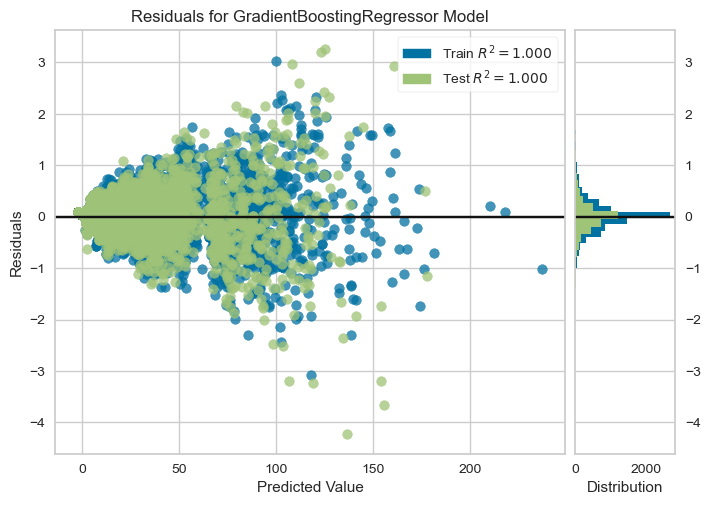

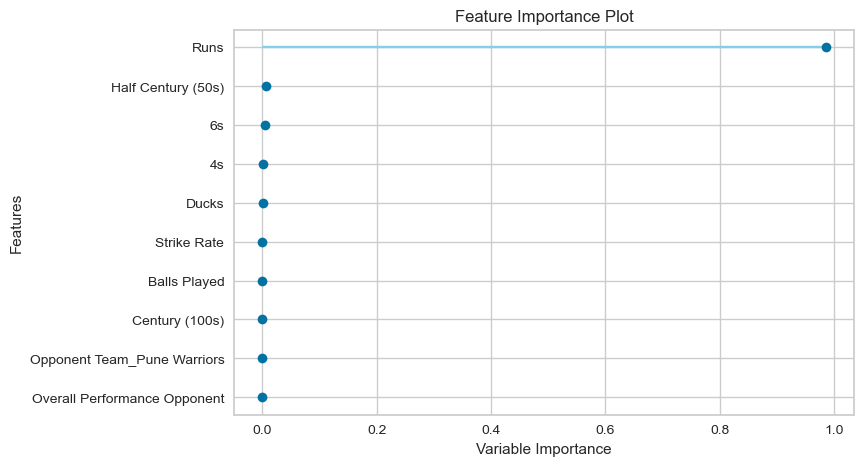

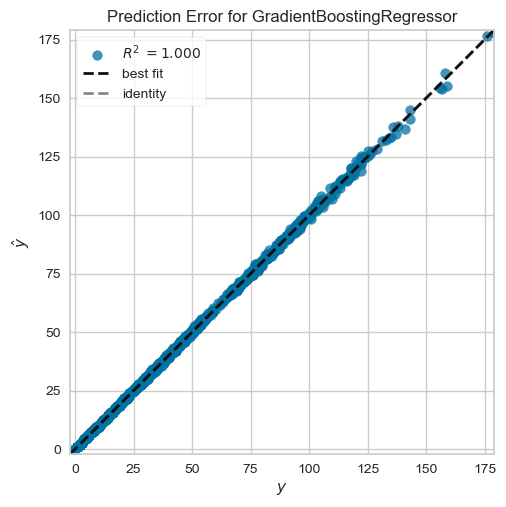

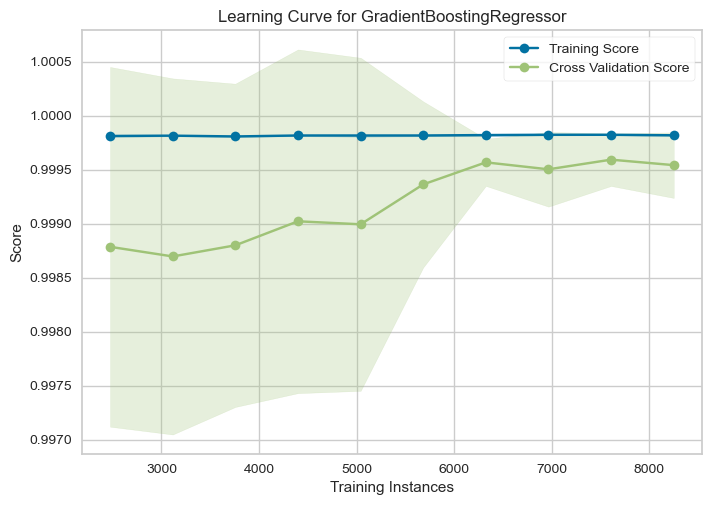

In [3]:
from pycaret.regression import evaluate_model, plot_model

# Evaluate the model (this will show a user interface for different plots)
evaluate_model(final_model)

# Example of plotting model metrics
# Plot a residual plot
plot_model(final_model, plot='residuals')

# Plot feature importance
plot_model(final_model, plot='feature')

# Plot error metrics (like Mean Absolute Error, Mean Squared Error, etc.)
plot_model(final_model, plot='error')

# Plot learning curve
plot_model(final_model, plot='learning')




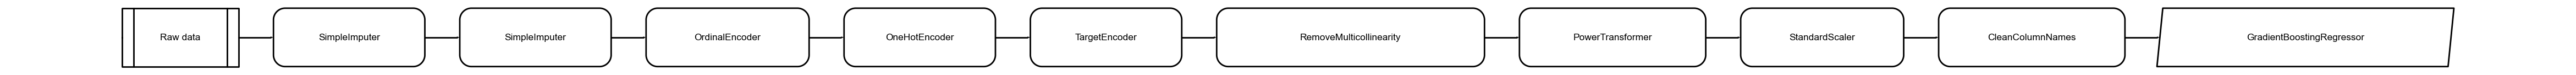

Parameters
alpha                               0.9
ccp_alpha                           0.0
criterion                  friedman_mse
init                               None
learning_rate                       0.1
loss                      squared_error
max_depth                             3
max_features                       None
max_leaf_nodes                     None
min_impurity_decrease               0.0
min_samples_leaf                      1
min_samples_split                     2
min_weight_fraction_leaf            0.0
n_estimators                        100
n_iter_no_change                   None
random_state                        123
subsample                           1.0
tol                              0.0001
validation_fraction                 0.1
verbose                               0
warm_start                        False

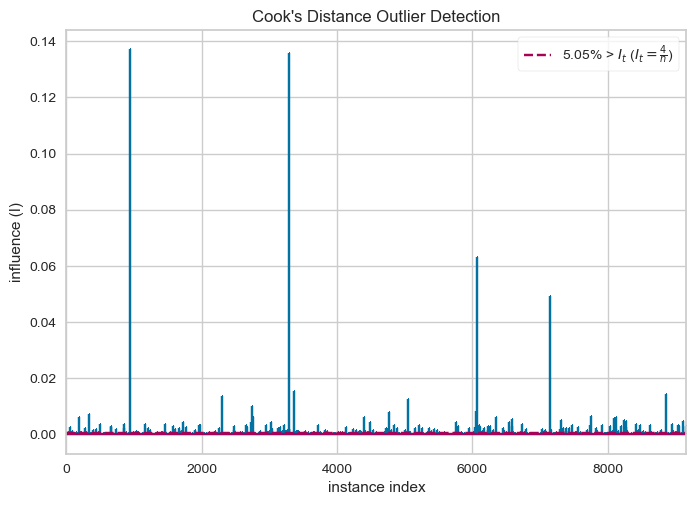

TypeError: Decision Tree plot is only available for scikit-learn Decision Trees and Forests, Ensemble models using those or Stacked models using those as meta (final) estimators.

In [4]:
plot_model(final_model, plot='pipeline')
plot_model(final_model, plot='parameter')
plot_model(final_model, plot='cooks')
plot_model(final_model, plot='tree')
plot_model(final_model, plot='vc')
plot_model(final_model, plot='residual_interactive')
